In [1]:
import torch 
from matplotlib import pyplot as plt
import math
import numpy as np
from scipy.stats import norm, chi2

In [2]:
state = torch.load('res/model_final.pth', map_location='cpu')

In [3]:
print(state.keys())

odict_keys(['detail.S1_1.conv.weight', 'detail.S1_1.bn.0.weight', 'detail.S1_1.bn.0.bias', 'detail.S1_1.bn.0.running_mean', 'detail.S1_1.bn.0.running_var', 'detail.S1_1.bn.0.num_batches_tracked', 'detail.S1_1.bn.1.weight', 'detail.S1_1.bn.1.bias', 'detail.S1_1.bn.1.running_mean', 'detail.S1_1.bn.1.running_var', 'detail.S1_1.bn.1.num_batches_tracked', 'detail.S1_2.conv.weight', 'detail.S1_2.bn.0.weight', 'detail.S1_2.bn.0.bias', 'detail.S1_2.bn.0.running_mean', 'detail.S1_2.bn.0.running_var', 'detail.S1_2.bn.0.num_batches_tracked', 'detail.S1_2.bn.1.weight', 'detail.S1_2.bn.1.bias', 'detail.S1_2.bn.1.running_mean', 'detail.S1_2.bn.1.running_var', 'detail.S1_2.bn.1.num_batches_tracked', 'detail.S2_1.conv.weight', 'detail.S2_1.bn.0.weight', 'detail.S2_1.bn.0.bias', 'detail.S2_1.bn.0.running_mean', 'detail.S2_1.bn.0.running_var', 'detail.S2_1.bn.0.num_batches_tracked', 'detail.S2_1.bn.1.weight', 'detail.S2_1.bn.1.bias', 'detail.S2_1.bn.1.running_mean', 'detail.S2_1.bn.1.running_var', 'deta

In [4]:
def BnSegToBar(bn_running_mean, width=0.02):
    data_dict = {}
#     print('min is : {}, max is : {}'.format(min(bn_running_mean),max(bn_running_mean)))
    for var in bn_running_mean:
        index = (var+width/2) / width  
        if index < 0:
            index -= 1
        index = int(index)
        index *= width
        if index in data_dict:
            data_dict[index] += 1
        else:
            data_dict[index] = 1
    return data_dict


#     plt.bar(list(data_dict.keys()), list(data_dict.values()), width=width)
def PltBarForBn(mean_dict1, mean_dict2, var_dict1, var_dict2, width1=0.02, width2=0.02, 
                width1_var=0.02, width2_var=0.02, title1='a2d2', title2='citys'):
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    # 设置x轴的说明
    plt.xlabel('bn_running_mean')
    # 设置y轴的说明
    plt.ylabel('Num')
    # 设置title
    plt.title(title1)
#     plt.xlim(-0.5, 0.5)
    plt.bar(list(mean_dict1.keys()), list(mean_dict1.values()), width=width1)
    
    plt.subplot(2, 2, 2)
    # 设置x轴的说明
    plt.xlabel('bn_running_mean')
    # 设置y轴的说明
    plt.ylabel('Num')
    # 设置title
    plt.title(title2)
#     plt.xlim(-0.5, 0.5)
    plt.bar(list(mean_dict2.keys()), list(mean_dict2.values()), width=width2)
    
    plt.subplot(2, 2, 3)
    # 设置x轴的说明
    plt.xlabel('bn_running_var')
    # 设置y轴的说明
    plt.ylabel('Num')
    # 设置title
#     plt.xlim(-0.5, 0.5)
    plt.bar(list(var_dict1.keys()), list(var_dict1.values()), width=width1_var)
    
    plt.subplot(2, 2, 4)
    # 设置x轴的说明
    plt.xlabel('bn_running_var')
    # 设置y轴的说明
    plt.ylabel('Num')
    # 设置title
#     plt.xlim(-0.5, 0.5)
    plt.bar(list(var_dict2.keys()), list(var_dict2.values()), width=width2_var)
    

In [5]:
# 比较对应通道位置bn层的差的分布
def CompareBnDistrib(bn1, bn2, title='NULL'):
#     diff_dict = {}
#     for val1, val2 in zip(bn1, bn2):
#         diff_val = math.fabs(val1 - val2)
#         diff_val = int(diff_val / width)*width
#         if diff_val in diff_dict:
#             diff_dict[diff_val] += 1
#         else:
#             diff_dict[diff_val] = 1
#     print(diff_dict)
    plt.figure()
    plt.title(title)
    plt.xlabel('values') #绘制x轴 
    plt.ylabel('num') #绘制y轴 
    x = [math.fabs(val1 - val2) for val1, val2 in zip(bn1, bn2)]
    plt.hist(x, 100, range=(0,1), alpha=0.5, edgecolor='r') 

In [22]:
# 比较对应通道位置bn层的差
def CompareBnValue(bn1, bn2, title='NULL'):

    plt.figure()
    plt.title(title)
    plt.xlabel('values') #绘制x轴 
    plt.ylabel('num') #绘制y轴 
    plt.bar(list(range(0, len(bn1))), bn1, alpha=0.5, edgecolor='r') 
    plt.bar(list(range(0, len(bn2))), bn2, alpha=0.5, edgecolor='k') 

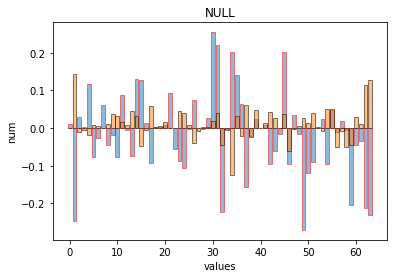

In [23]:
CompareBnValue(state['detail.S1_1.bn.0.running_mean'], state['detail.S1_1.bn.1.running_mean'])

In [7]:
for key in state.keys():
    if key.find('bn') != -1:
        if key.find('running_mean') != -1:
            print(key)
        elif key.find('running_var') != -1:
            print(key)

detail.S1_1.bn.0.running_mean
detail.S1_1.bn.0.running_var
detail.S1_1.bn.1.running_mean
detail.S1_1.bn.1.running_var
detail.S1_2.bn.0.running_mean
detail.S1_2.bn.0.running_var
detail.S1_2.bn.1.running_mean
detail.S1_2.bn.1.running_var
detail.S2_1.bn.0.running_mean
detail.S2_1.bn.0.running_var
detail.S2_1.bn.1.running_mean
detail.S2_1.bn.1.running_var
detail.S2_2.bn.0.running_mean
detail.S2_2.bn.0.running_var
detail.S2_2.bn.1.running_mean
detail.S2_2.bn.1.running_var
detail.S2_3.bn.0.running_mean
detail.S2_3.bn.0.running_var
detail.S2_3.bn.1.running_mean
detail.S2_3.bn.1.running_var
detail.S3_1.bn.0.running_mean
detail.S3_1.bn.0.running_var
detail.S3_1.bn.1.running_mean
detail.S3_1.bn.1.running_var
detail.S3_2.bn.0.running_mean
detail.S3_2.bn.0.running_var
detail.S3_2.bn.1.running_mean
detail.S3_2.bn.1.running_var
detail.S3_3.bn.0.running_mean
detail.S3_3.bn.0.running_var
detail.S3_3.bn.1.running_mean
detail.S3_3.bn.1.running_var
segment.S1S2.conv.bn.0.running_mean
segment.S1S2.conv.bn

In [8]:
# 画出通道值的直方图分布
def plotRes(data1, data2, title='NULL'):
    plt.figure()
    x = np.array(data1) #这里填入你的数据list 如果已经是array格式就不用转化了
    x2 = np.array(data2) #这里填入你的数据list 如果已经是array格式就不用转化了
    x_max = max(max(x), max(x2))
    x_min = min(min(x), min(x2))
    hist_range = (x_min, x_max)
    #n, bins, patches = plt.hist(x, 20, density=1, facecolor='blue', alpha=0.75)  #第二个参数是直方图柱子的数量
    mu =np.mean(x) #计算均值 
    sigma =np.std(x) 
    mu2 =np.mean(x2) #计算均值 
    sigma2 =np.std(x2) 
    num_bins = 30 #直方图柱子的数量 
    n, bins, patches = plt.hist(x, num_bins, range=hist_range, alpha=0.5, edgecolor='r') 
    n, bins2, patches = plt.hist(x2, num_bins, range=hist_range, alpha=0.5, edgecolor='k') 
    #直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象 
    y = norm.pdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y 
    y2 = norm.pdf(bins2, mu2, sigma2)#拟合一条最佳正态分布曲线y  

    plt.grid(True)
#     plt.plot(bins, y, 'b') #绘制y的曲线 
#     plt.plot(bins2, y2, 'r') #绘制y的曲线 
    plt.xlabel('values') #绘制x轴 
    plt.ylabel('num') #绘制y轴 
    plt.title(title)  #中文标题 u'xxx' 
    #plt.subplots_adjust(left=0.15)#左边距 
#     plt.show()

C:\Users\Mrhonor\AppData\Local\Temp\ipykernel_8956\2369929651.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


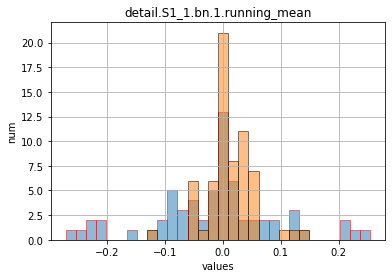

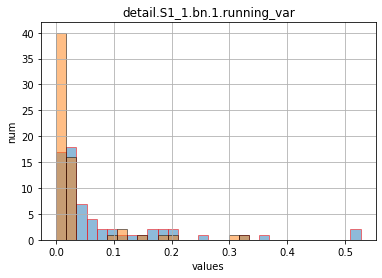

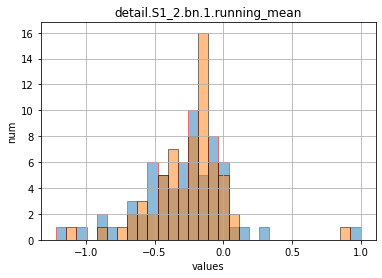

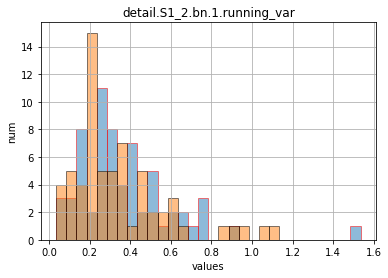

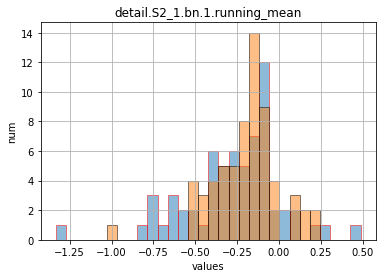

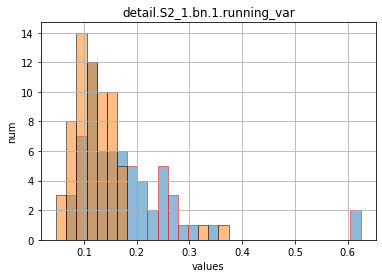

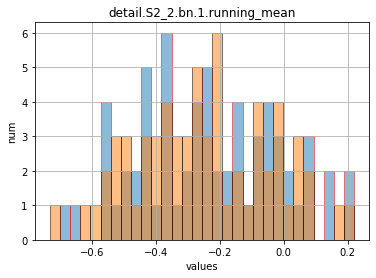

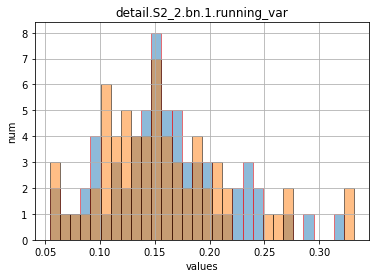

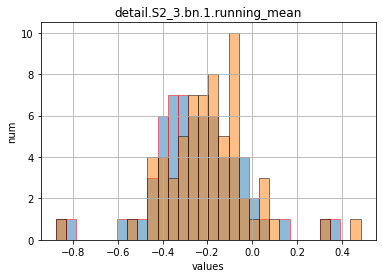

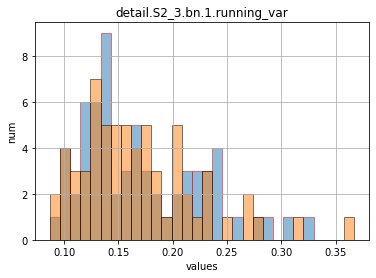

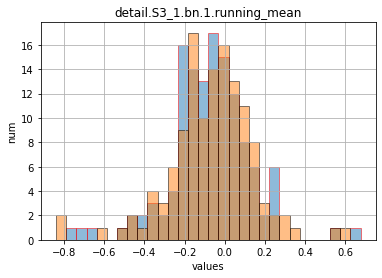

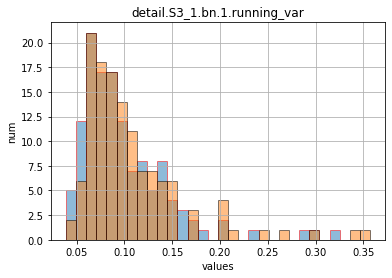

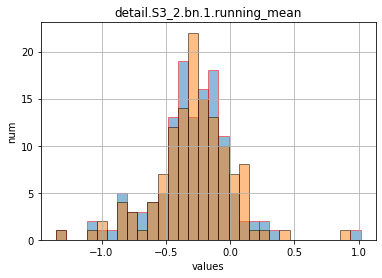

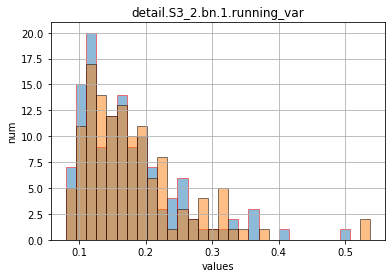

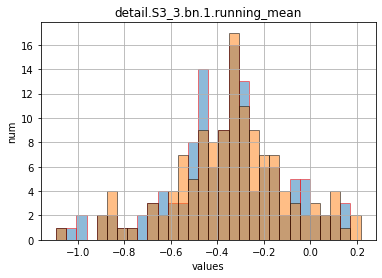

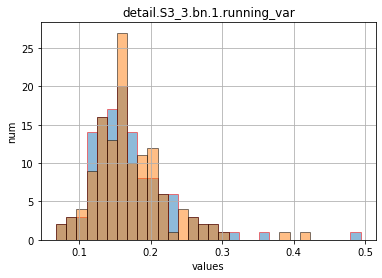

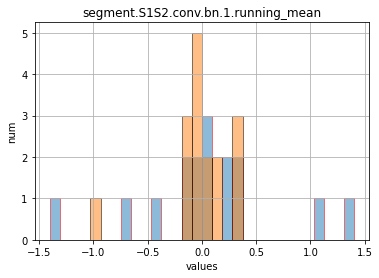

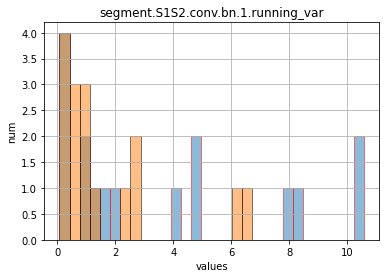

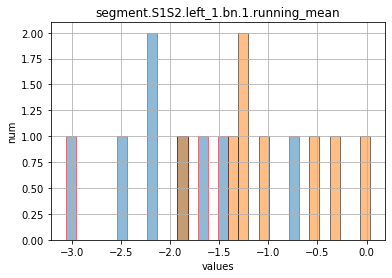

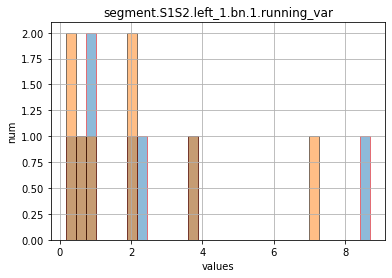

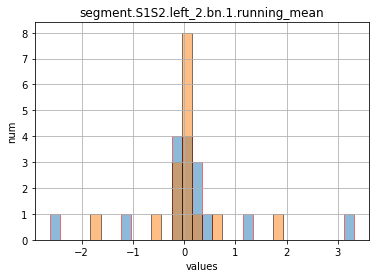

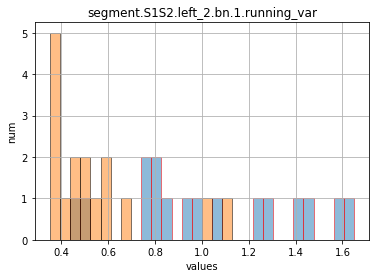

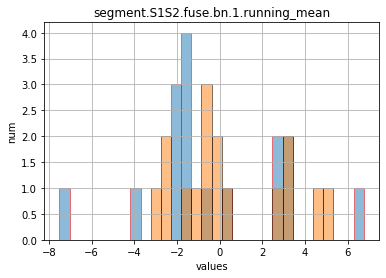

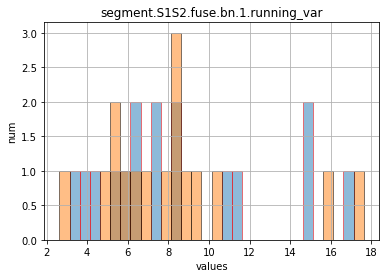

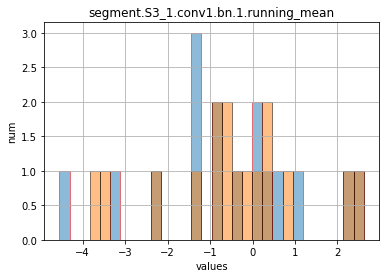

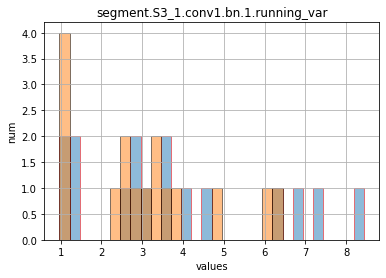

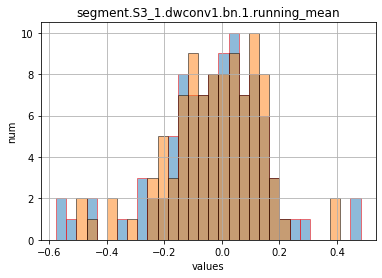

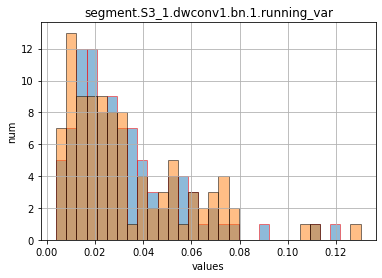

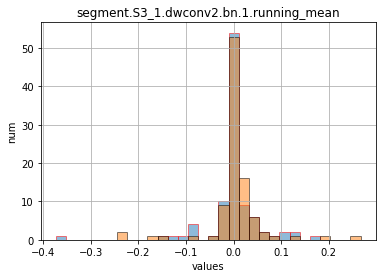

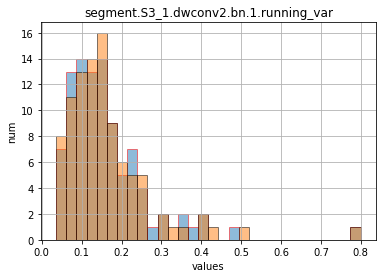

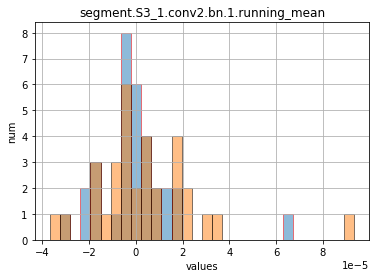

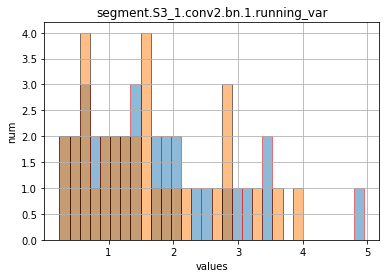

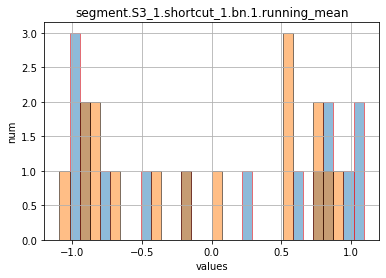

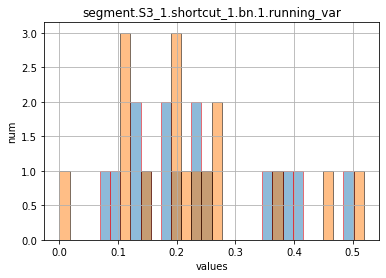

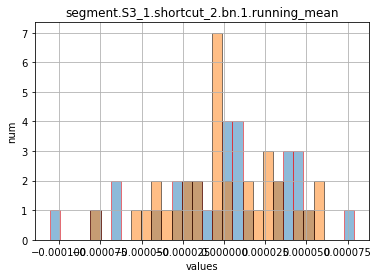

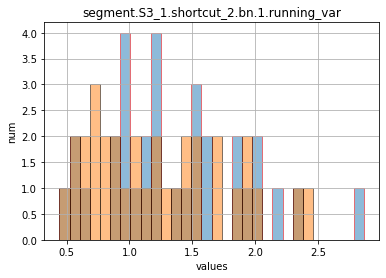

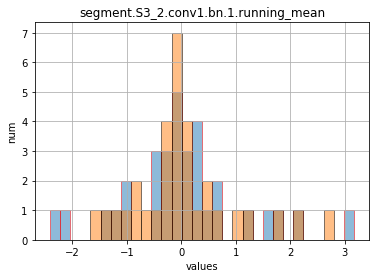

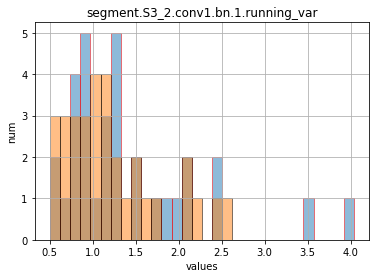

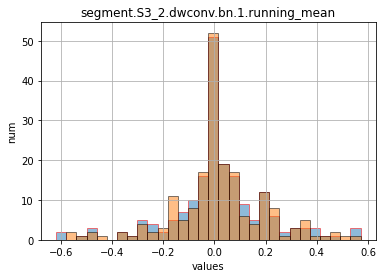

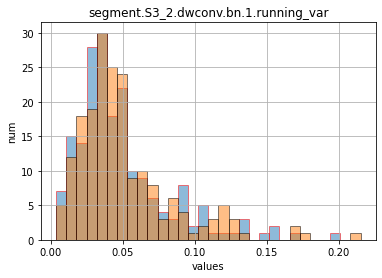

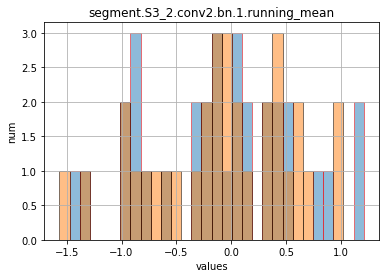

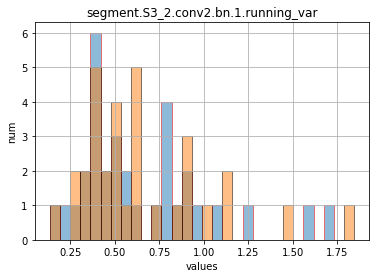

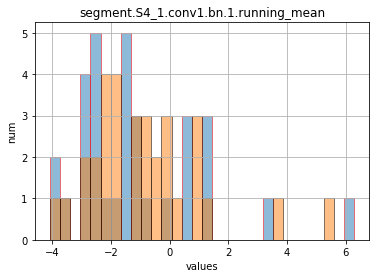

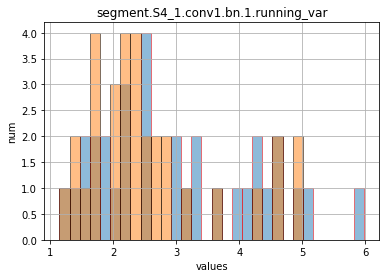

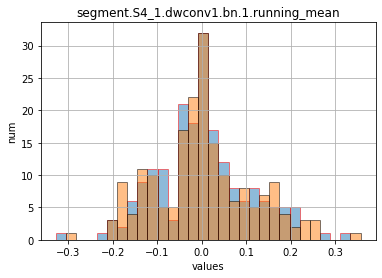

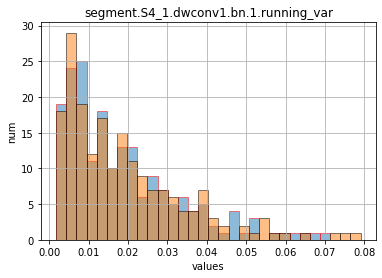

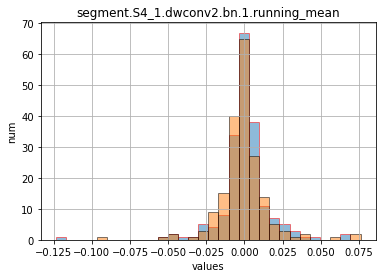

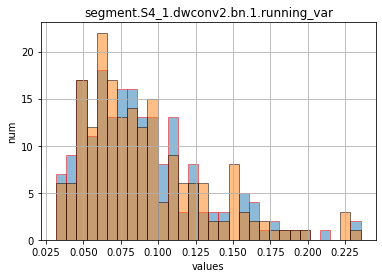

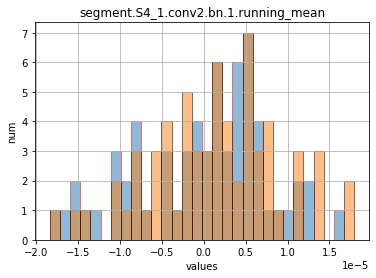

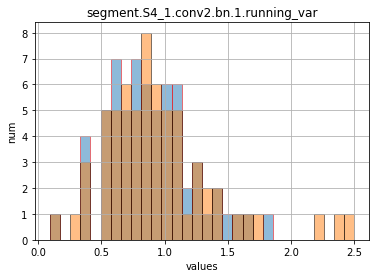

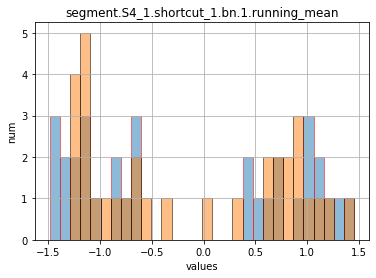

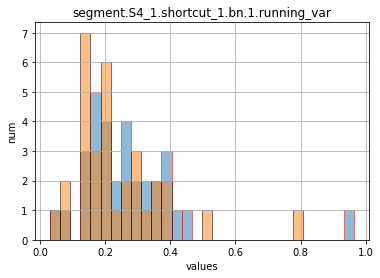

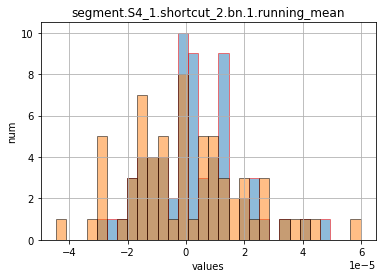

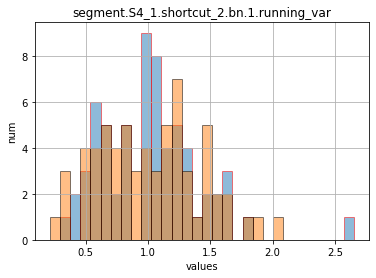

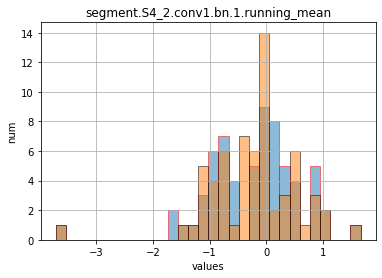

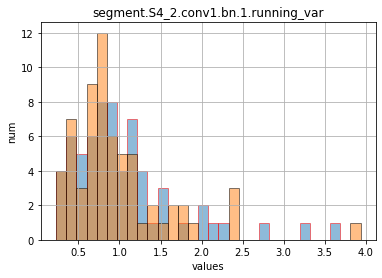

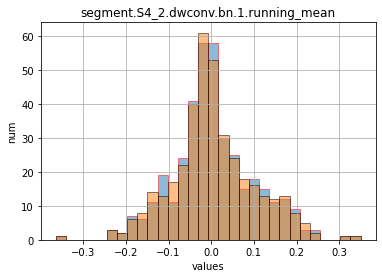

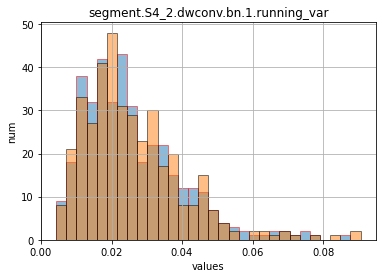

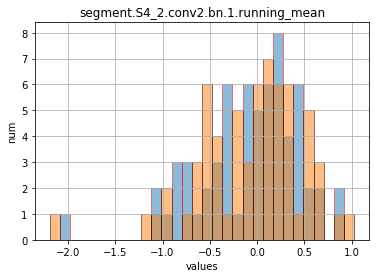

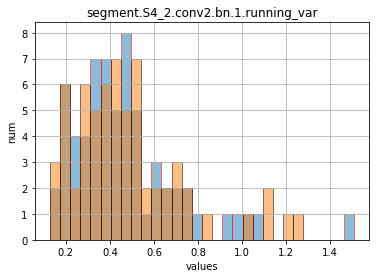

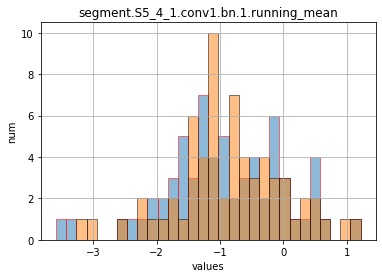

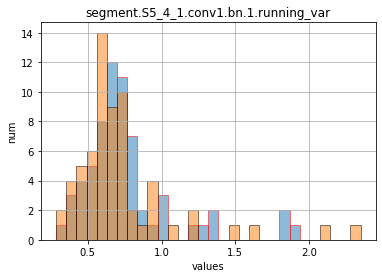

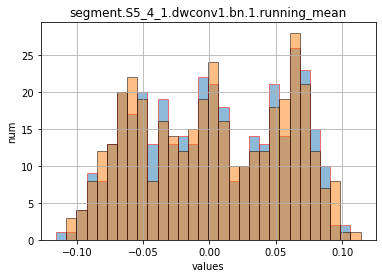

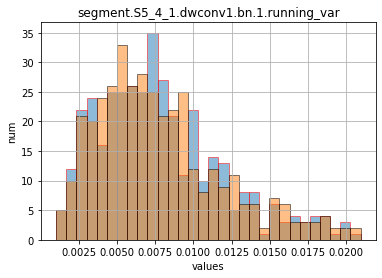

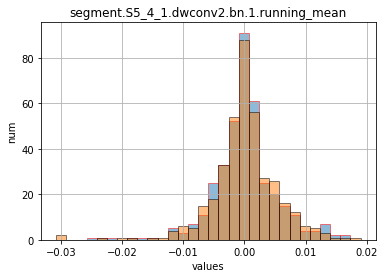

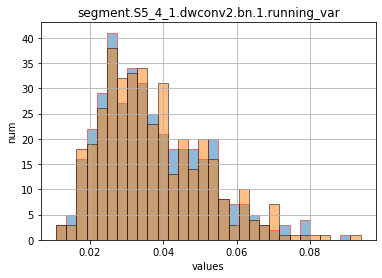

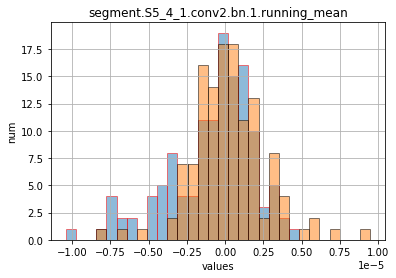

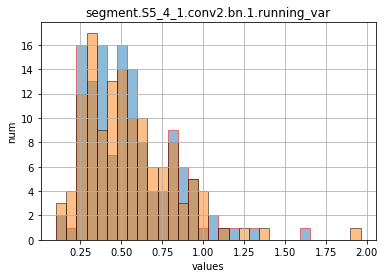

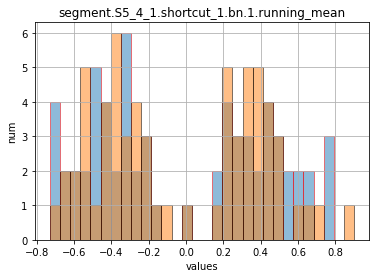

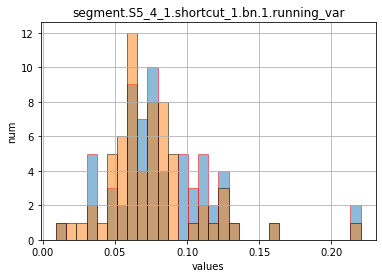

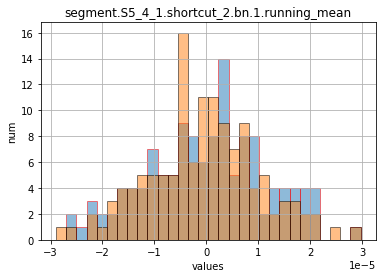

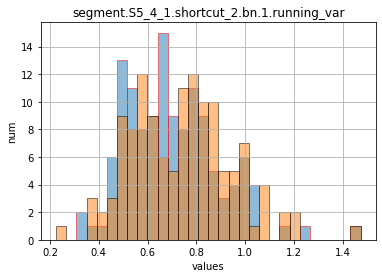

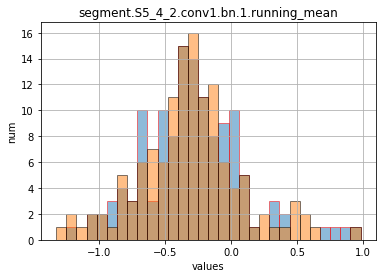

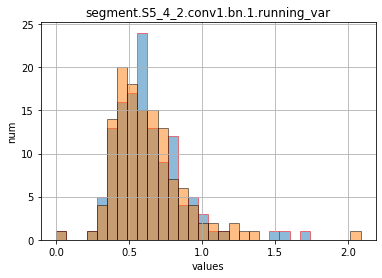

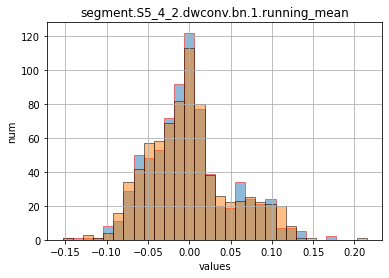

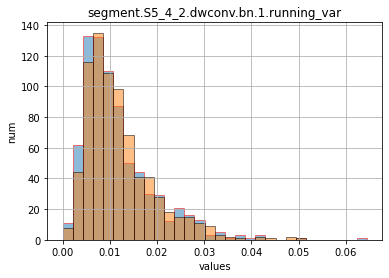

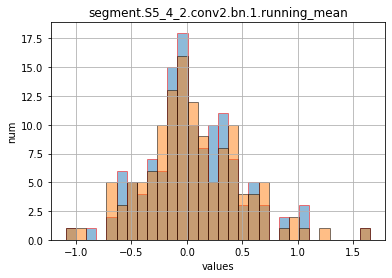

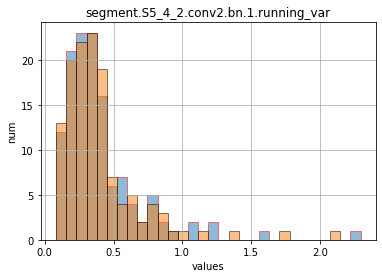

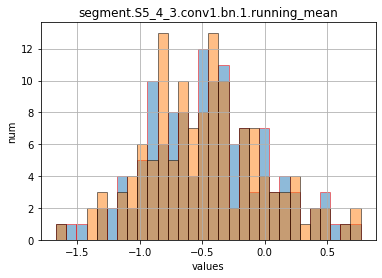

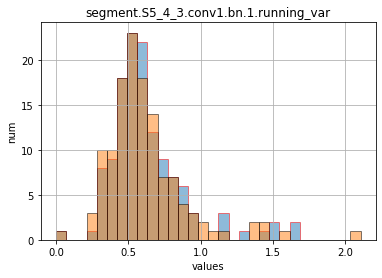

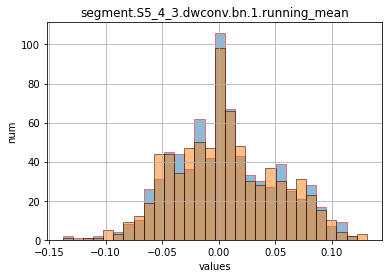

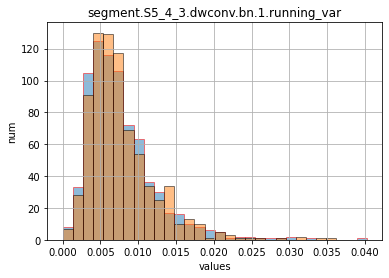

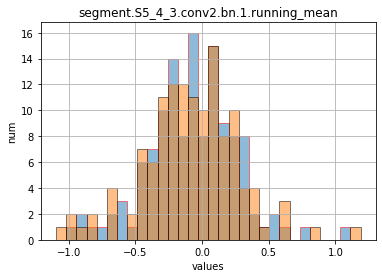

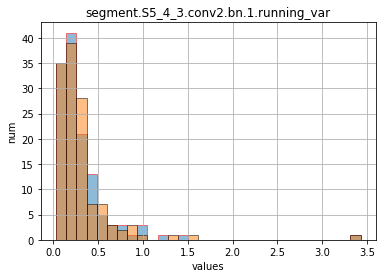

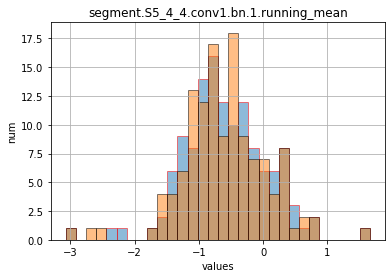

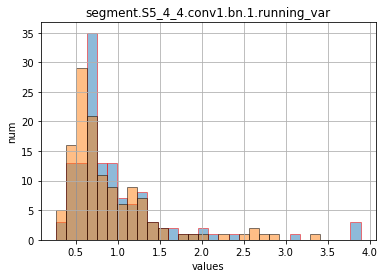

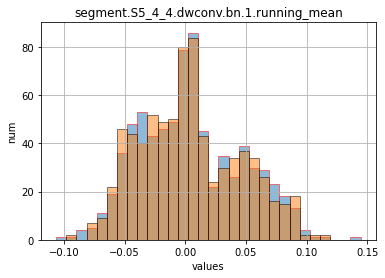

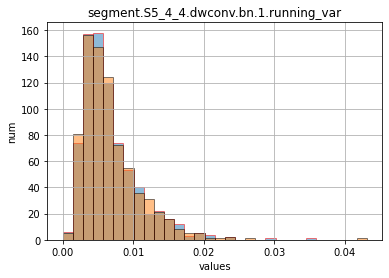

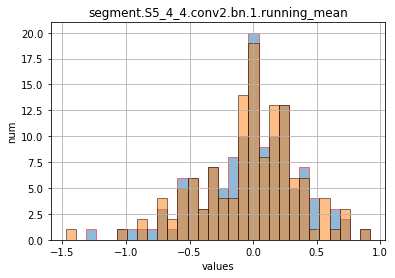

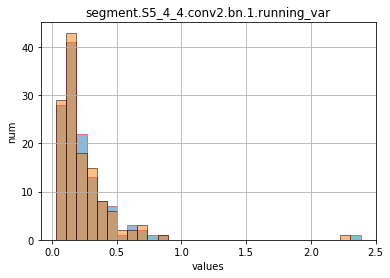

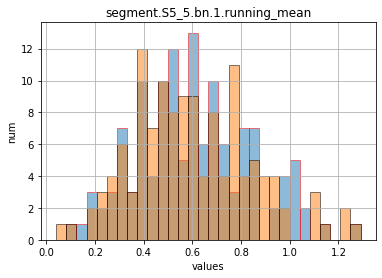

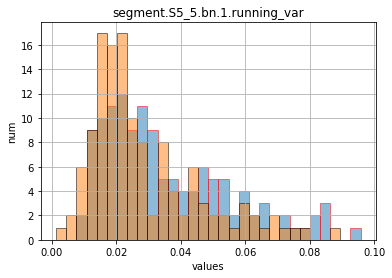

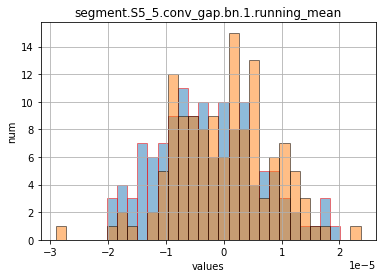

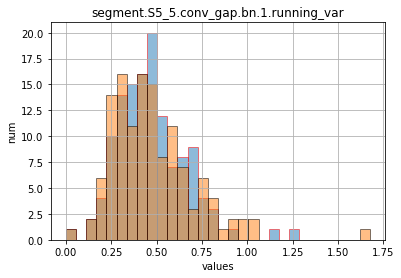

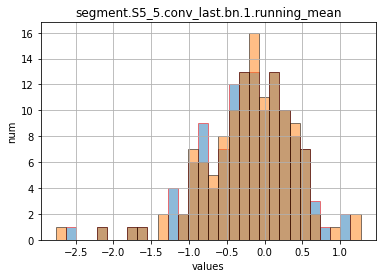

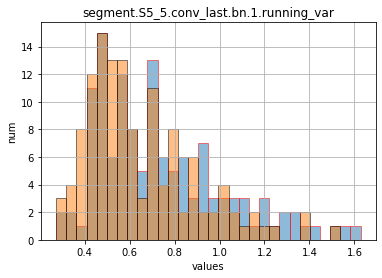

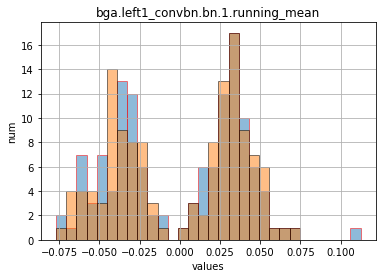

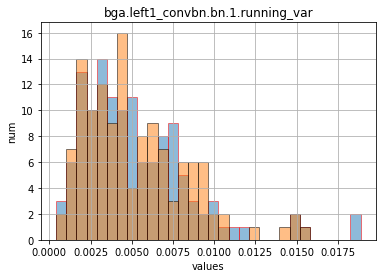

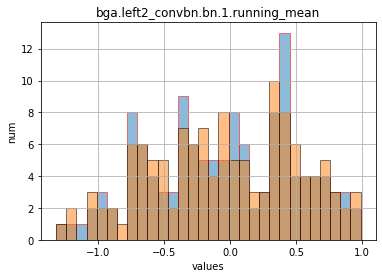

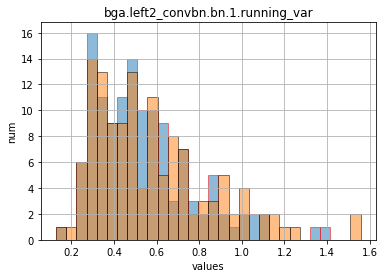

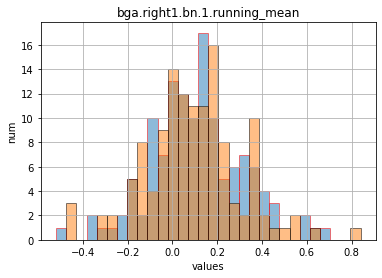

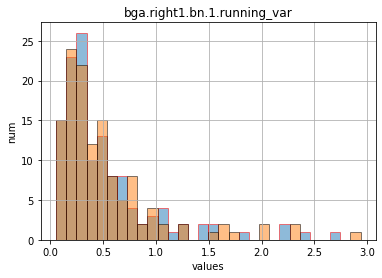

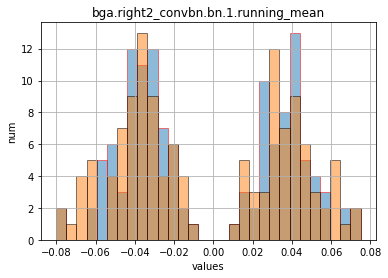

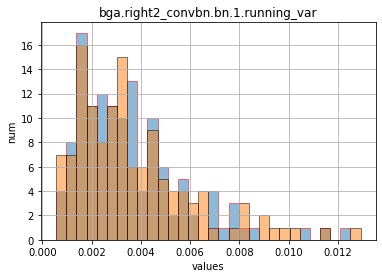

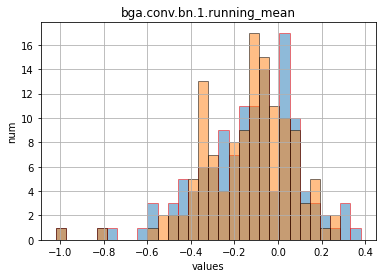

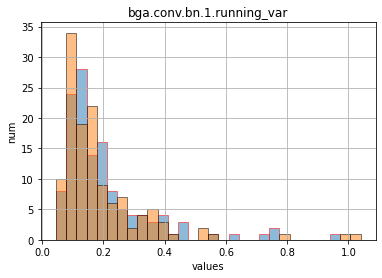

In [9]:
mean_count = 0
var_count = 0
temp_mean = 0
temp_var = 0
for key in state.keys():
    if key.find('bn') != -1 and key.find('aux') == -1 and key.find('head') == -1:
        if key.find('running_mean') != -1:
            mean_count += 1
            if mean_count == 2:
                mean_count = 0
                plotRes(temp_mean, state[key], str(key))
            else:
                temp_mean = state[key]
        elif key.find('running_var') != -1:
            var_count += 1
            if var_count == 2:
                var_count = 0
                plotRes(temp_var, state[key], str(key))
            else:
                temp_var = state[key]

C:\Users\Mrhonor\AppData\Local\Temp\ipykernel_8956\3744699204.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


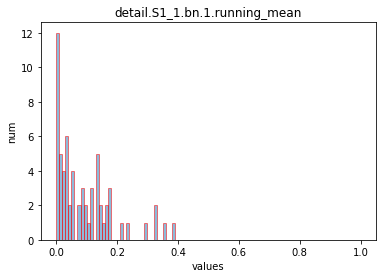

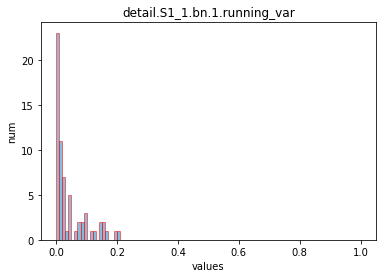

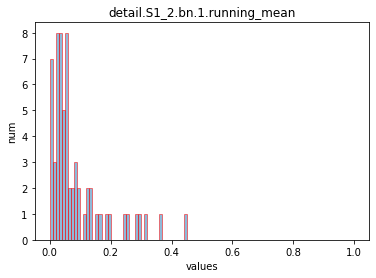

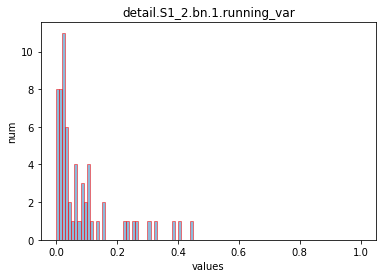

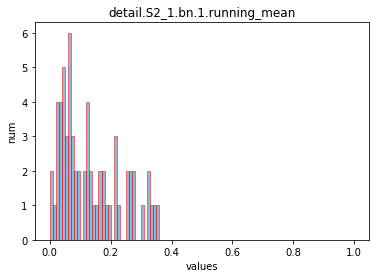

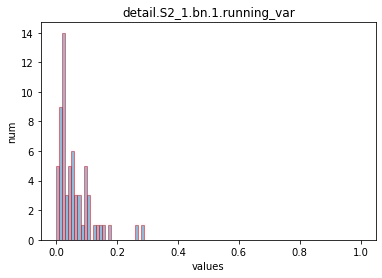

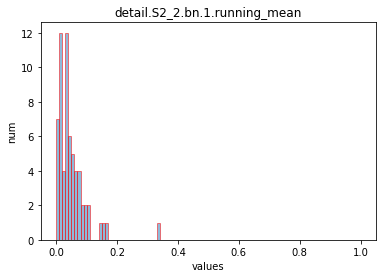

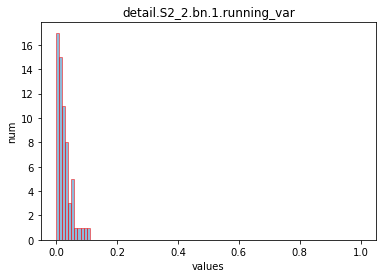

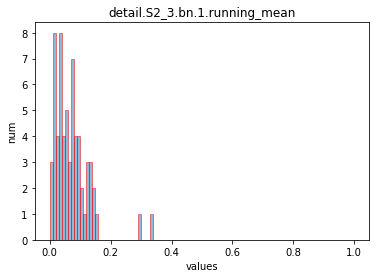

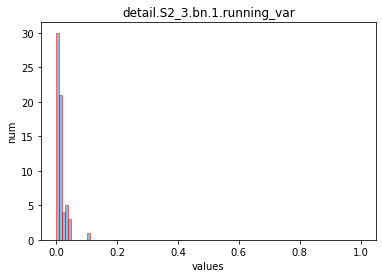

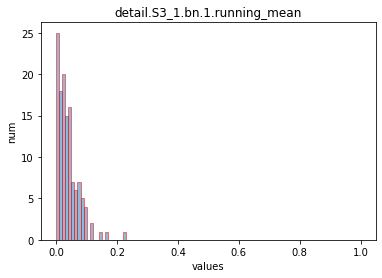

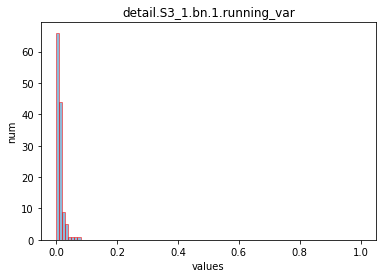

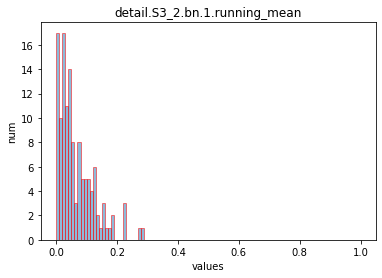

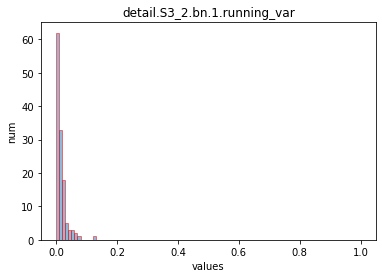

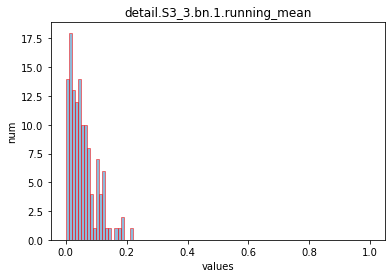

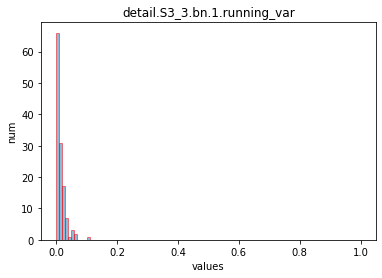

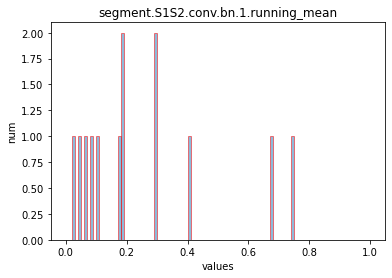

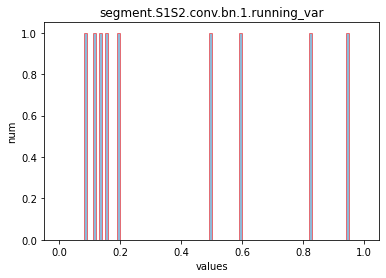

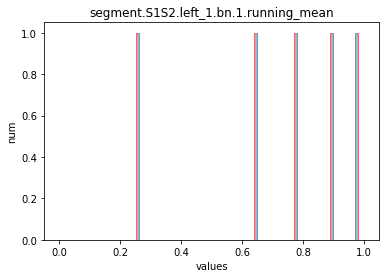

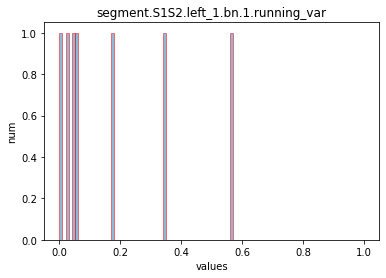

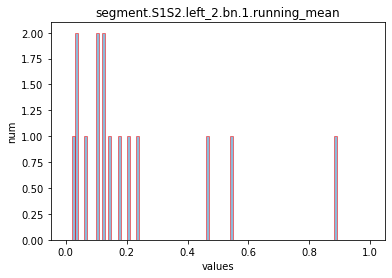

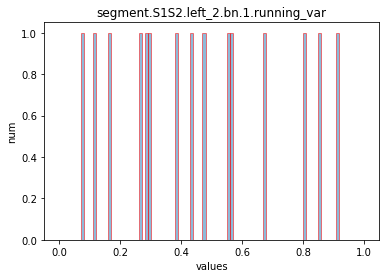

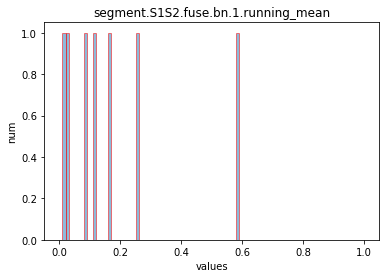

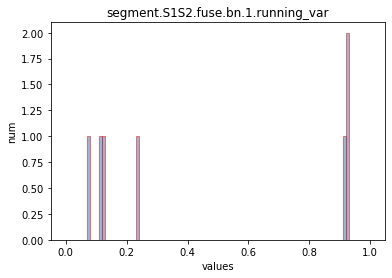

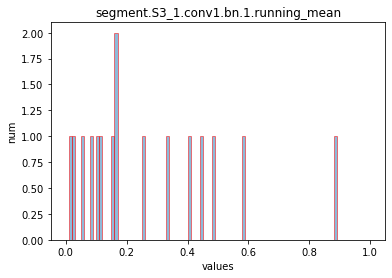

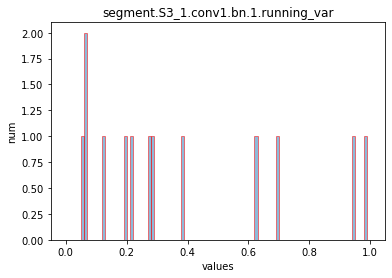

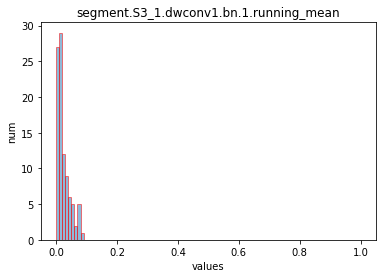

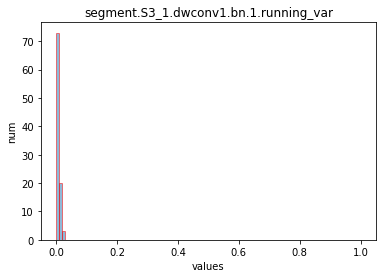

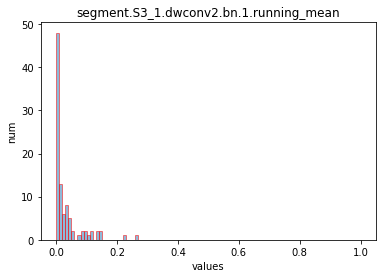

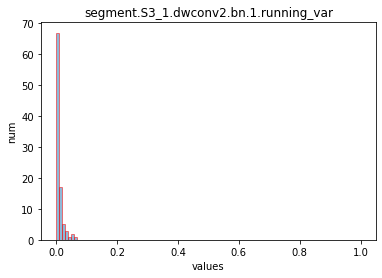

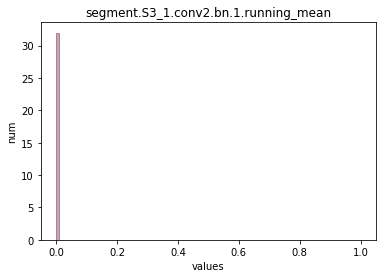

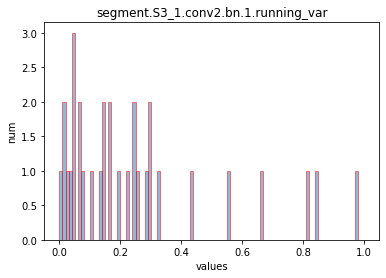

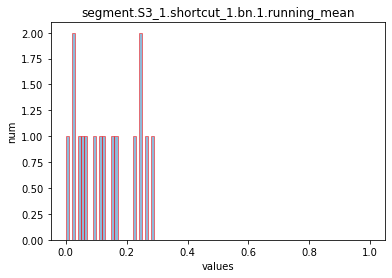

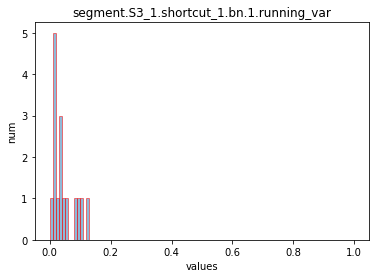

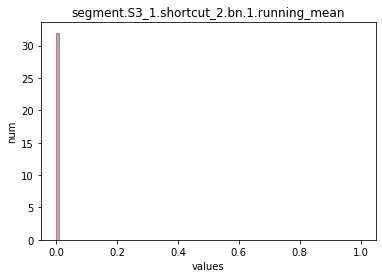

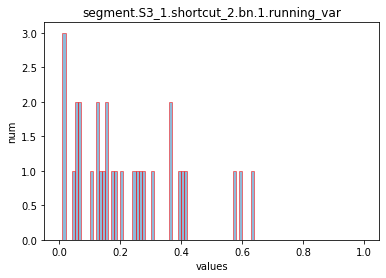

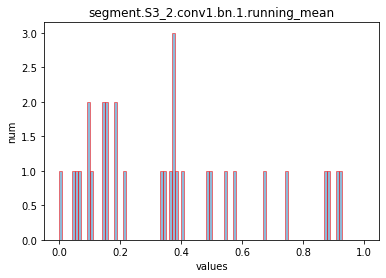

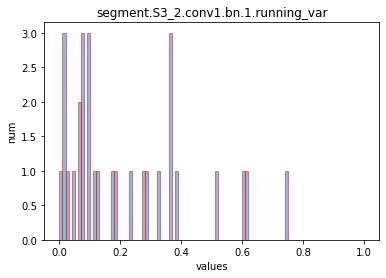

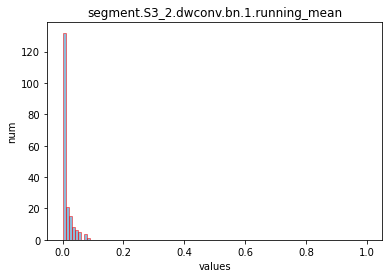

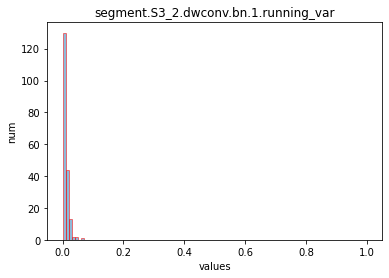

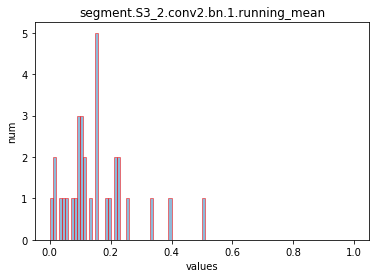

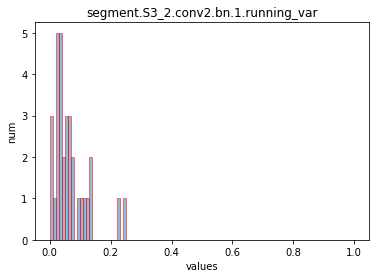

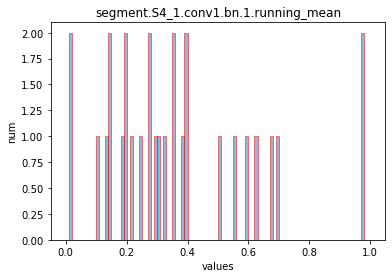

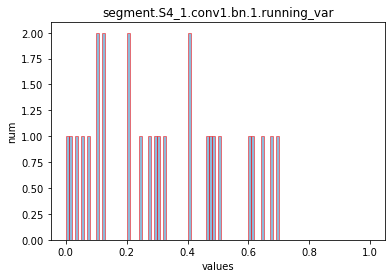

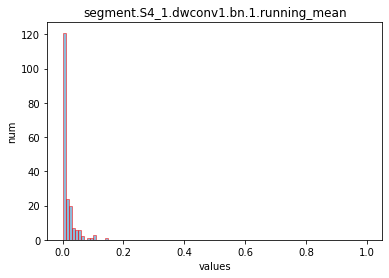

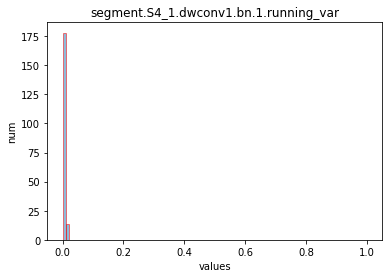

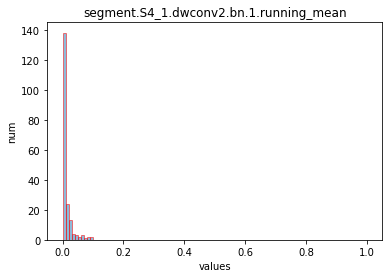

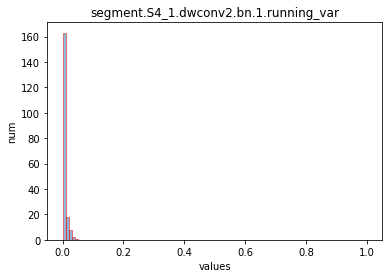

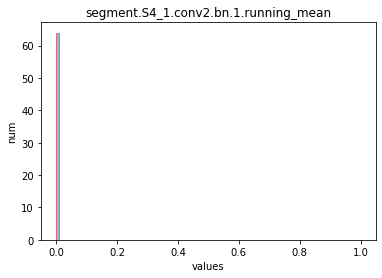

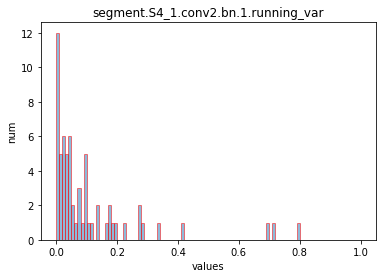

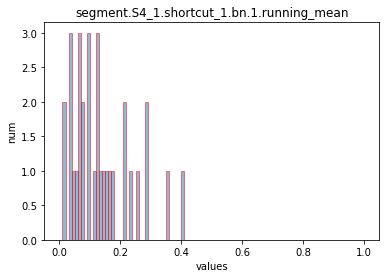

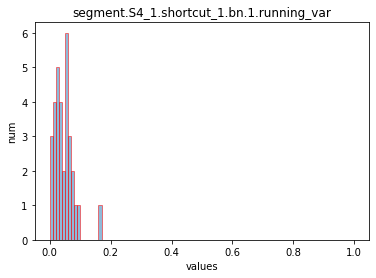

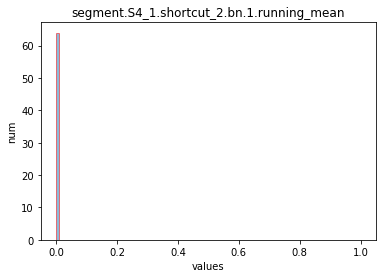

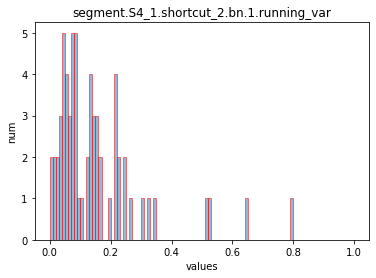

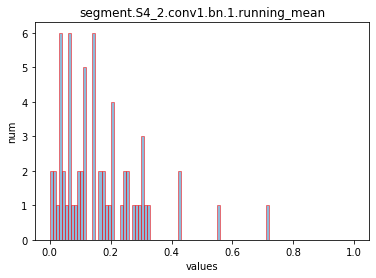

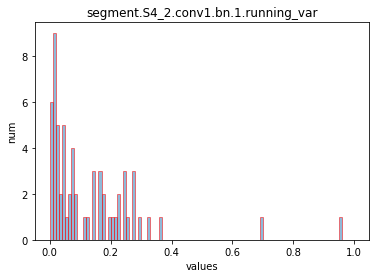

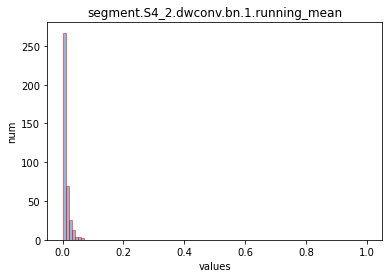

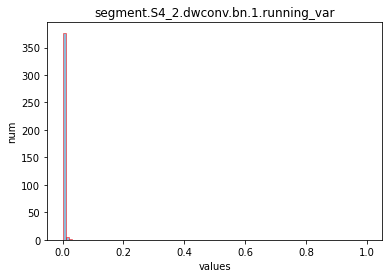

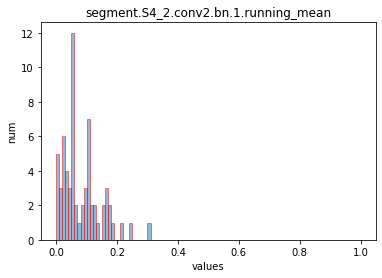

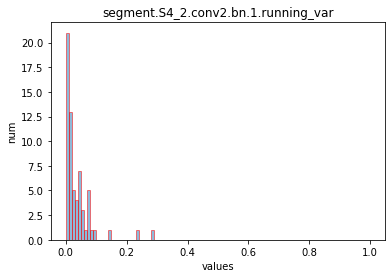

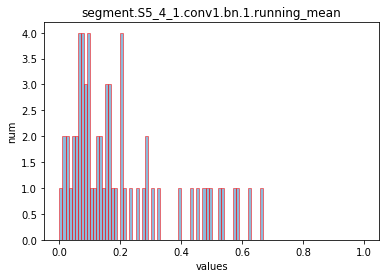

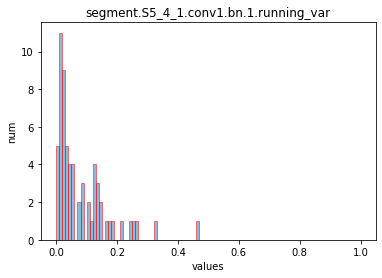

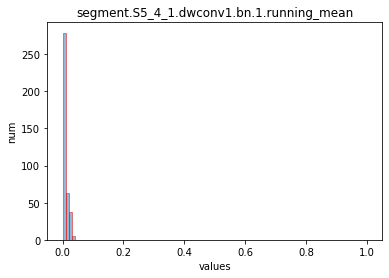

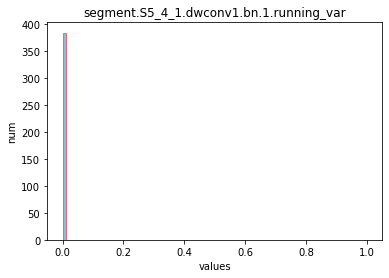

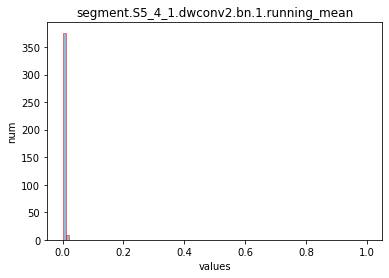

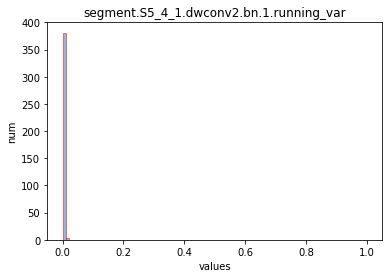

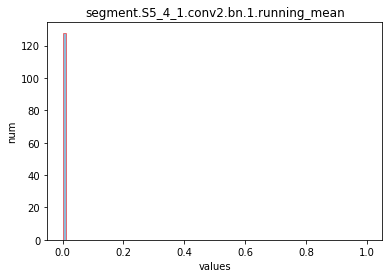

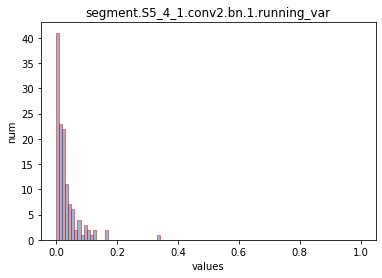

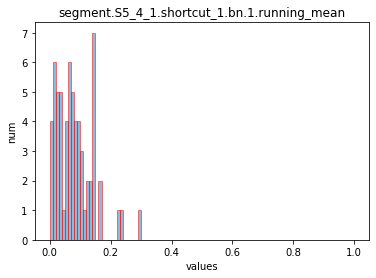

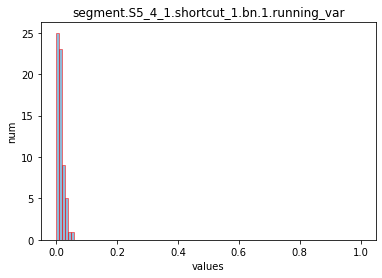

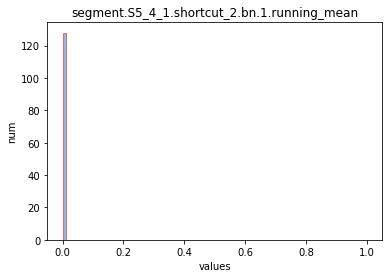

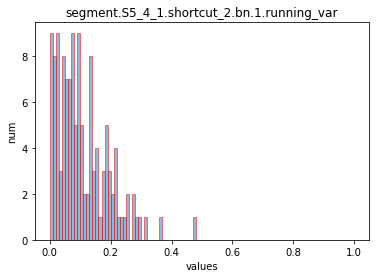

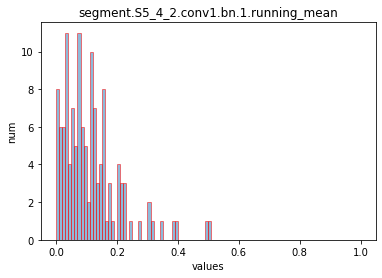

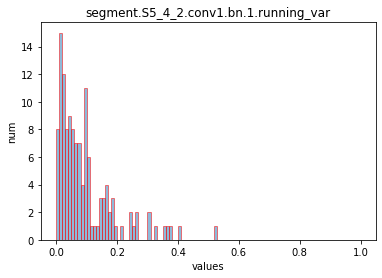

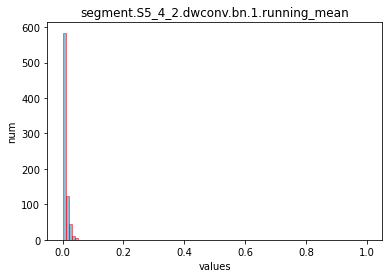

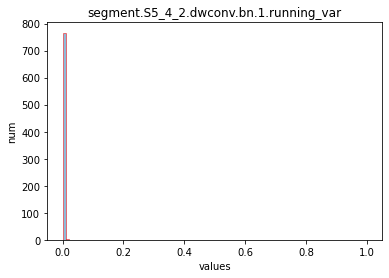

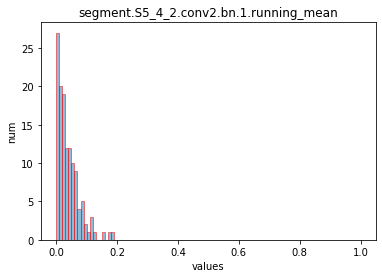

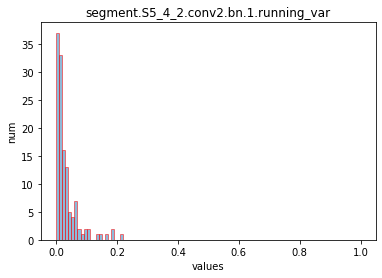

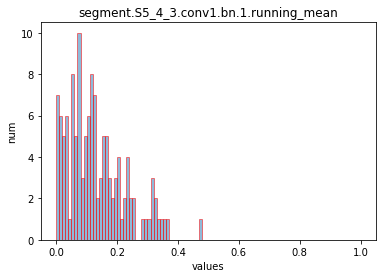

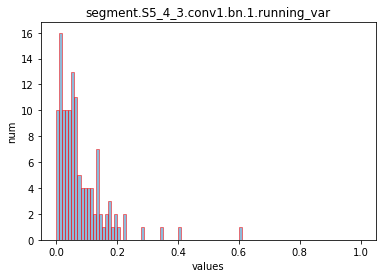

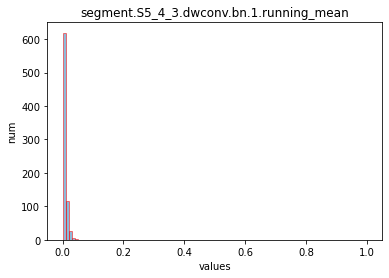

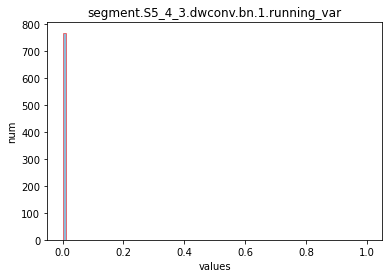

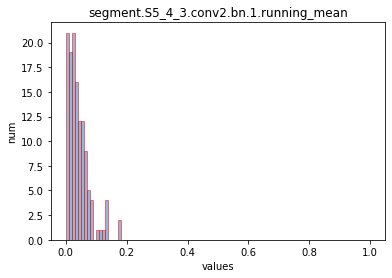

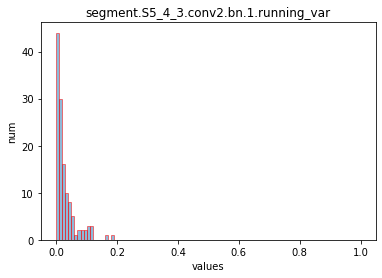

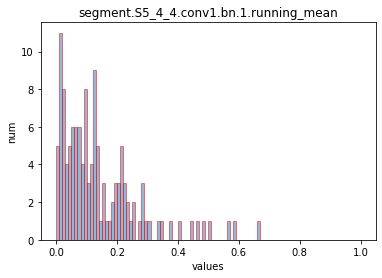

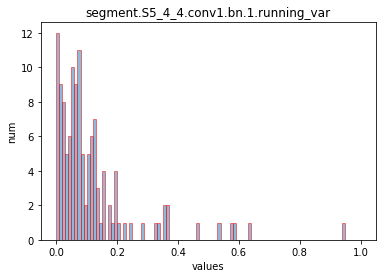

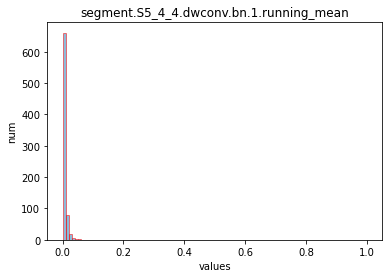

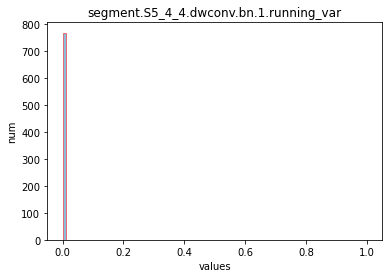

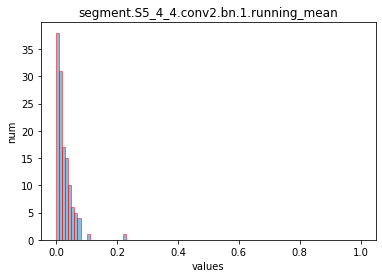

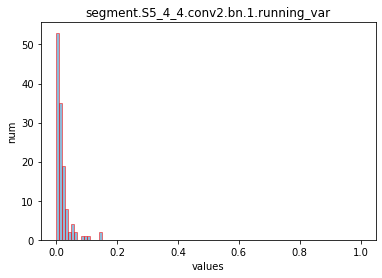

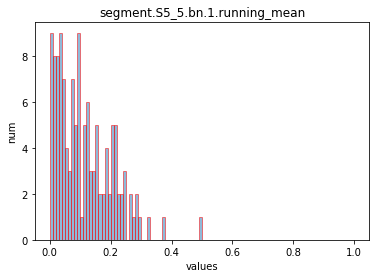

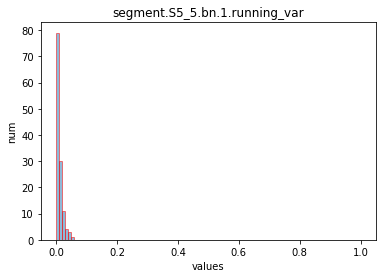

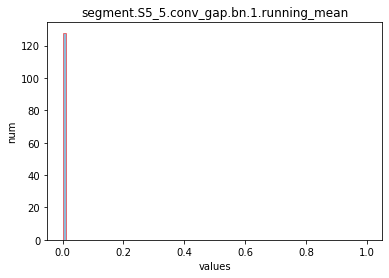

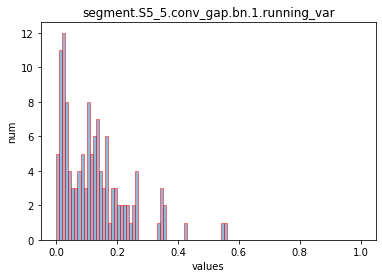

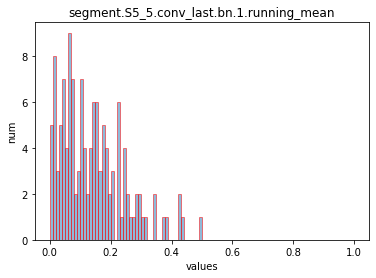

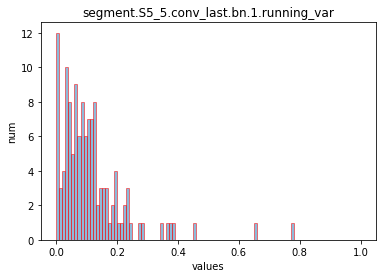

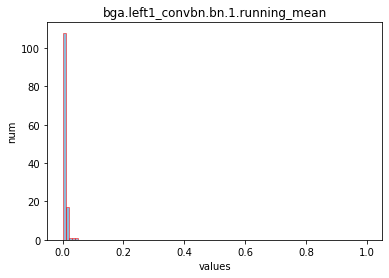

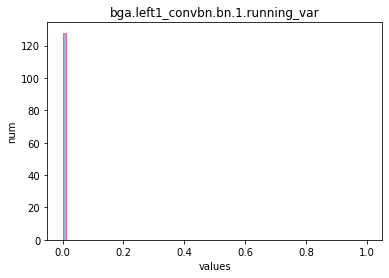

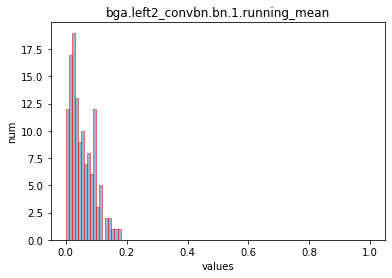

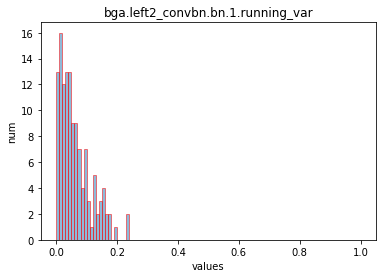

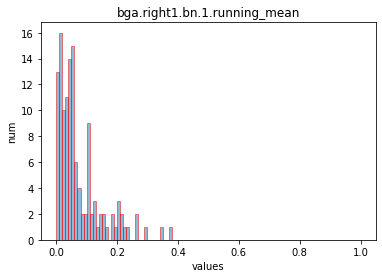

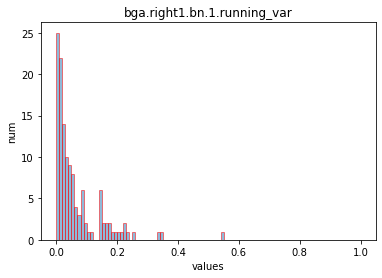

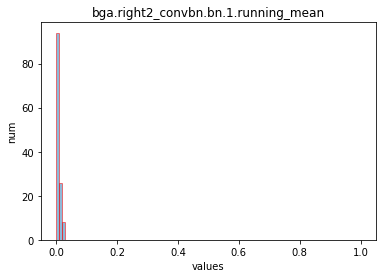

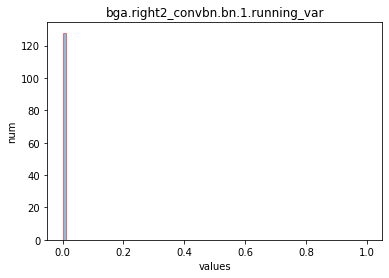

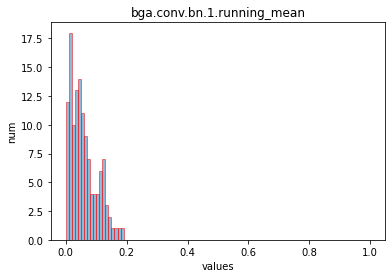

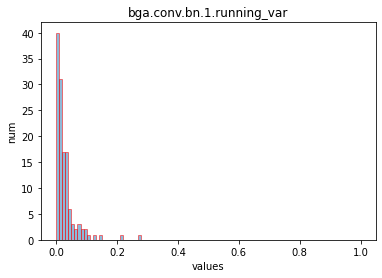

In [10]:
mean_count = 0
var_count = 0
temp_mean = 0
temp_var = 0
for key in state.keys():
    if key.find('bn') != -1 and key.find('aux') == -1 and key.find('head') == -1:
        if key.find('running_mean') != -1:
            mean_count += 1
            if mean_count == 2:
                mean_count = 0
                CompareBnDistrib(temp_mean, state[key], str(key))
            else:
                temp_mean = state[key]
        elif key.find('running_var') != -1:
            var_count += 1
            if var_count == 2:
                var_count = 0
                CompareBnDistrib(temp_var, state[key], str(key))
            else:
                temp_var = state[key]

In [37]:
def plotAll(bn1, bn2, title='NULL'):
    plt.figure(figsize=(20, 5))
    plt.subplot(1,3,1)
    x = np.array(bn1) #这里填入你的数据list 如果已经是array格式就不用转化了
    x2 = np.array(bn2) #这里填入你的数据list 如果已经是array格式就不用转化了
    x_max = max(max(x), max(x2))
    x_min = min(min(x), min(x2))
    hist_range = (x_min, x_max)
    #n, bins, patches = plt.hist(x, 20, density=1, facecolor='blue', alpha=0.75)  #第二个参数是直方图柱子的数量
    mu =np.mean(x) #计算均值 
    sigma =np.std(x) 
    mu2 =np.mean(x2) #计算均值 
    sigma2 =np.std(x2) 
    num_bins = 30 #直方图柱子的数量 
    n, bins, patches = plt.hist(x, num_bins, range=hist_range, alpha=0.5, edgecolor='r') 
    n, bins2, patches = plt.hist(x2, num_bins, range=hist_range, alpha=0.5, edgecolor='k') 
    #直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象 
    y = norm.pdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y 
    y2 = norm.pdf(bins2, mu2, sigma2)#拟合一条最佳正态分布曲线y  

    plt.grid(True)

    plt.xlabel('values') #绘制x轴 
    plt.ylabel('num') #绘制y轴 
    plt.title(title)  #中文标题 u'xxx' 
    
    plt.subplot(1,3,2)
    plt.title(title)
    plt.xlabel('values') #绘制x轴 
    plt.ylabel('num') #绘制y轴 
    x = [math.fabs(val1 - val2) for val1, val2 in zip(bn1, bn2)]
    plt.hist(x, 100, range=(0,1), alpha=0.5, edgecolor='r') 
    
    plt.subplot(1,3,3)
    plt.title(title)
    plt.xlabel('values') #绘制x轴 
    plt.ylabel('num') #绘制y轴 
    plt.bar(list(range(0, len(bn1))), bn1, alpha=0.5, edgecolor='r') 
    plt.bar(list(range(0, len(bn2))), bn2, alpha=0.5, edgecolor='k') 

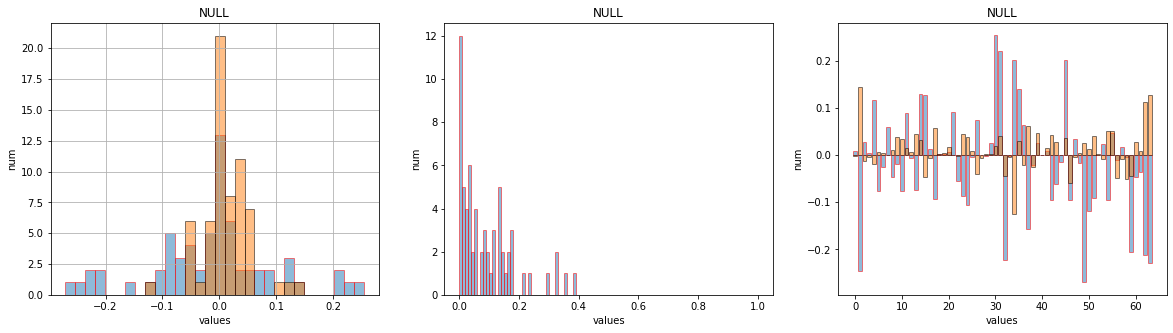

In [38]:
plotAll(state['detail.S1_1.bn.0.running_mean'], state['detail.S1_1.bn.1.running_mean'])

C:\Users\Mrhonor\AppData\Local\Temp\ipykernel_8956\3643966024.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 5))


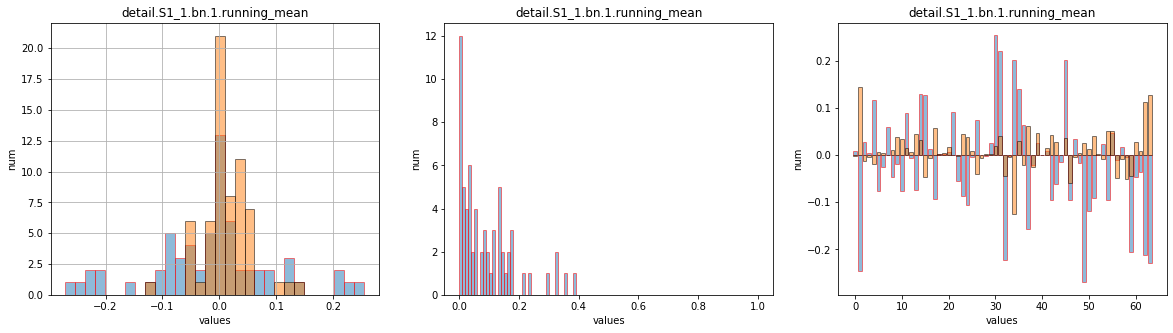

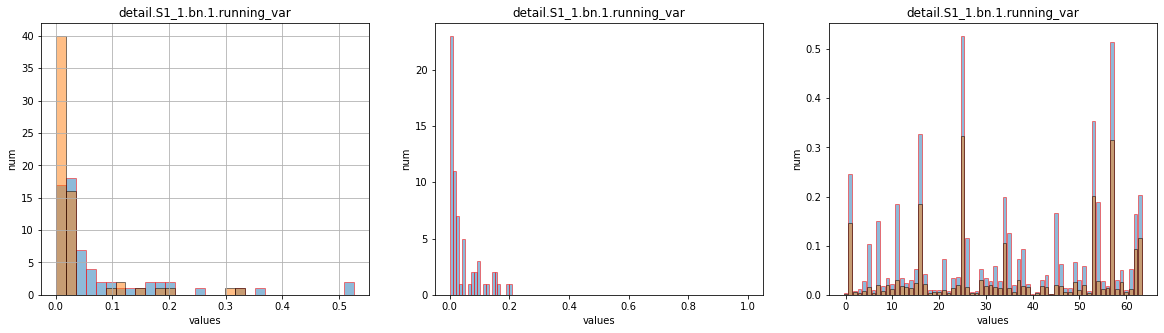

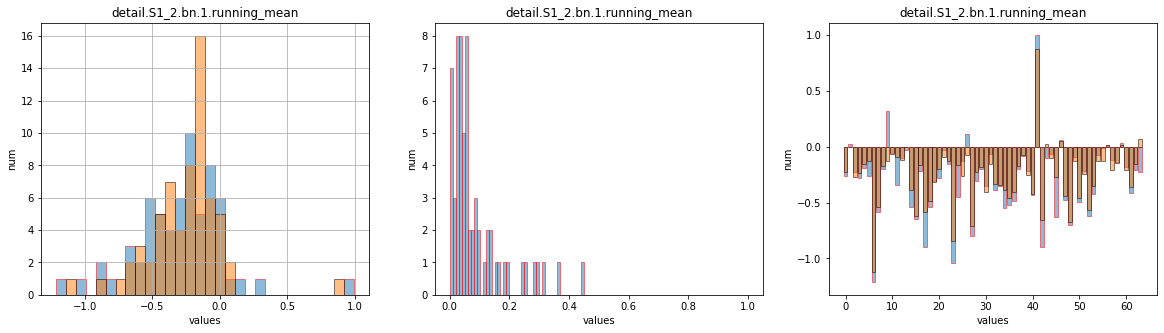

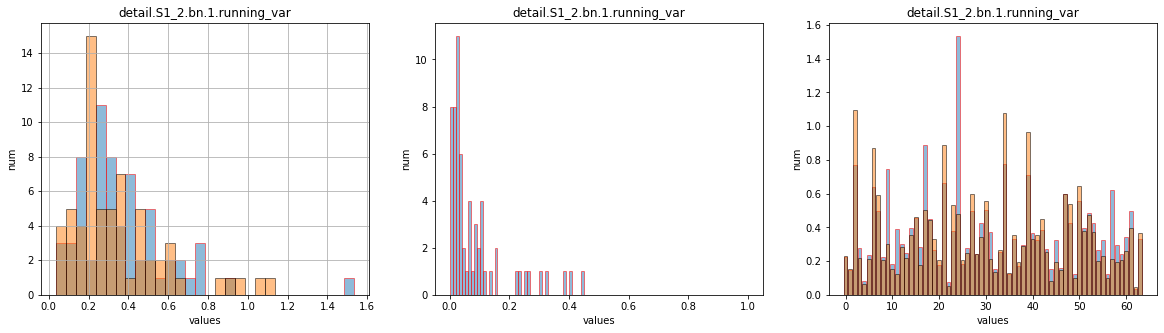

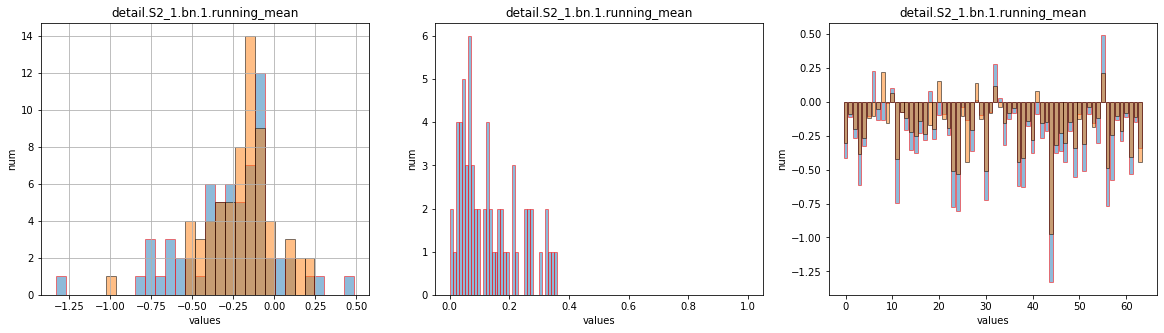

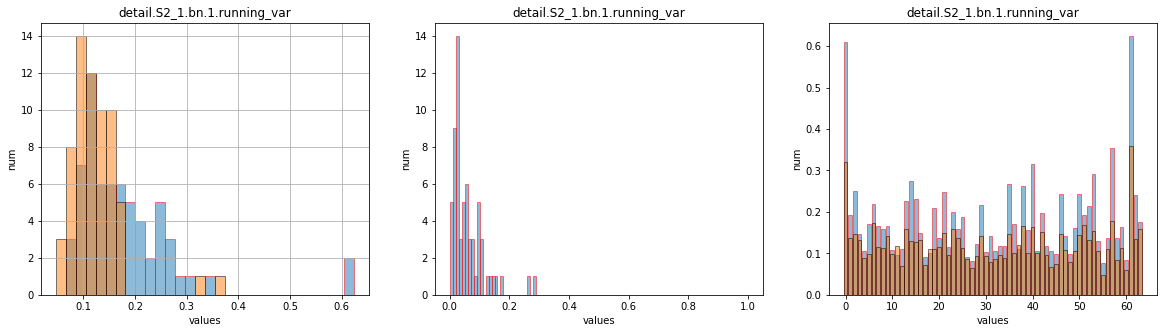

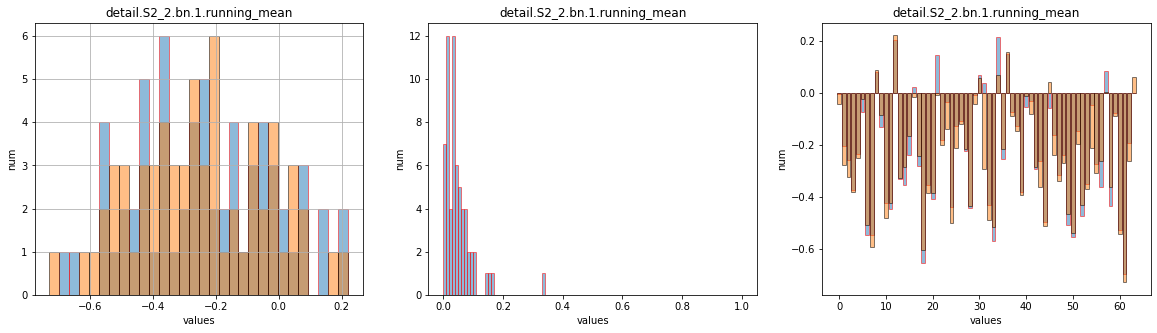

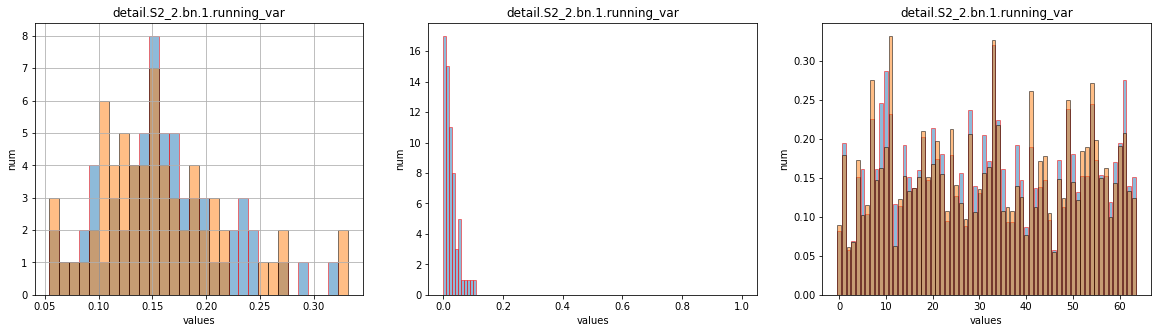

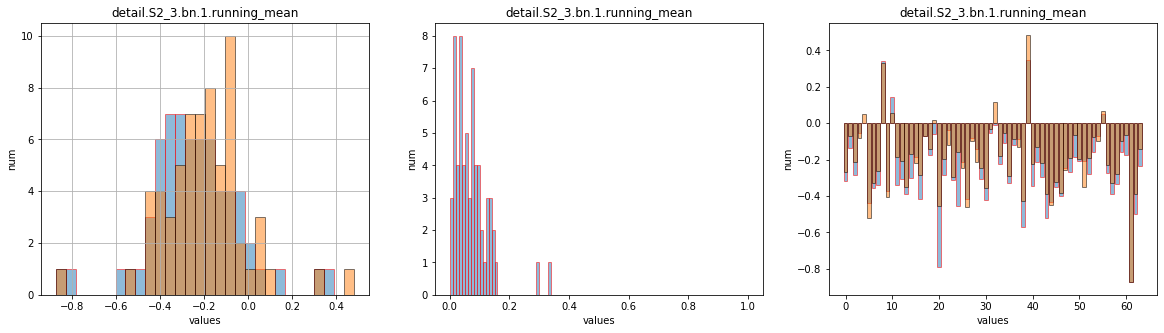

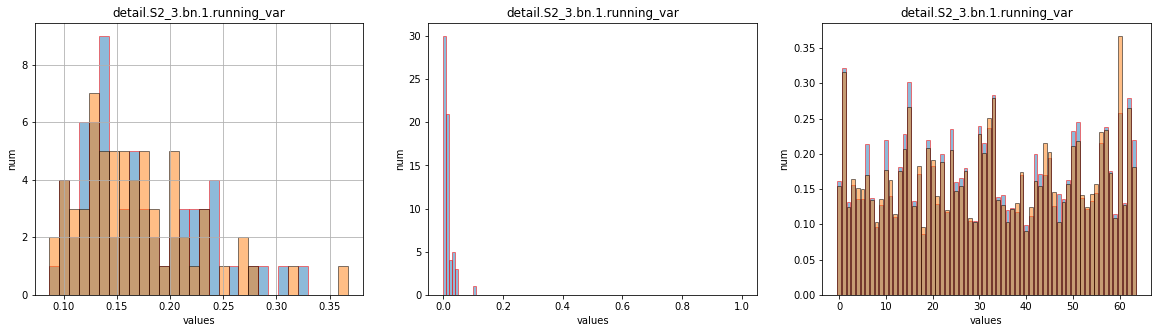

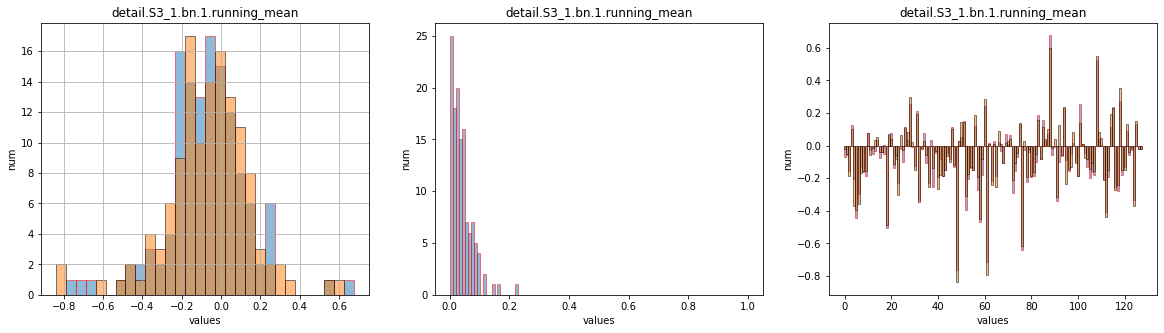

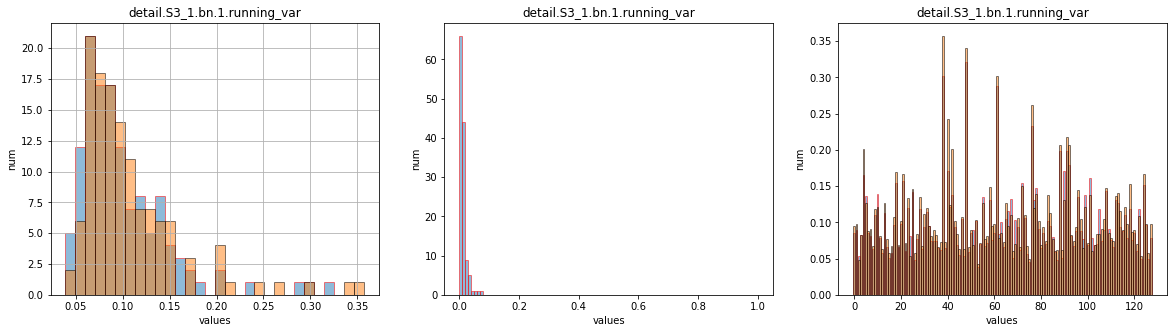

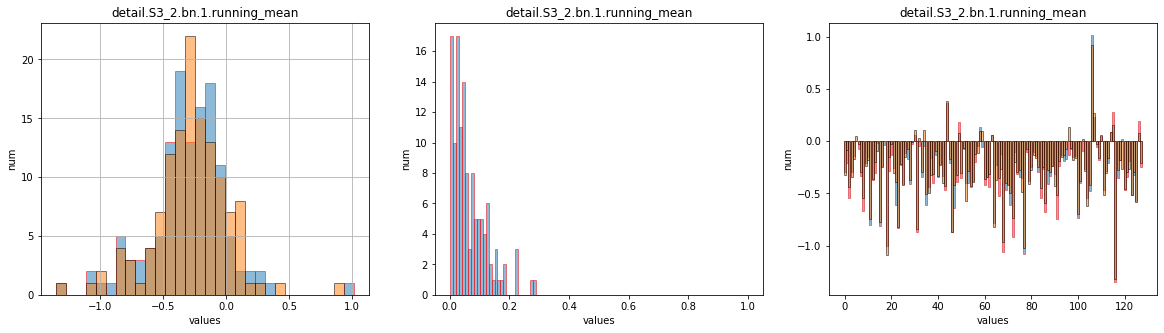

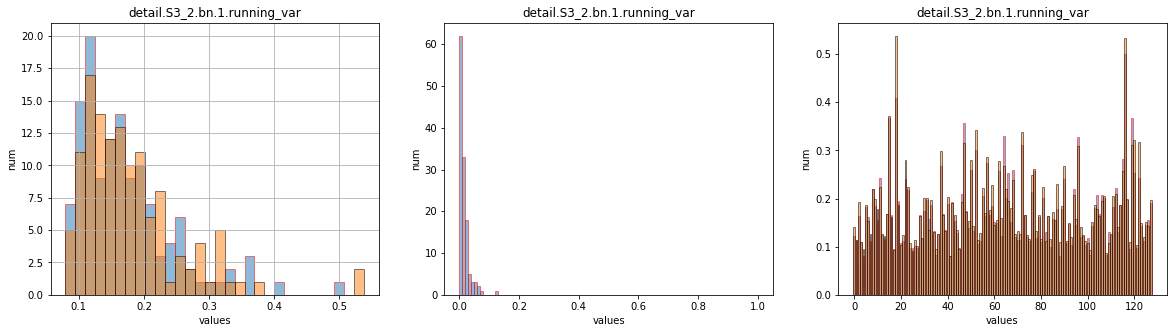

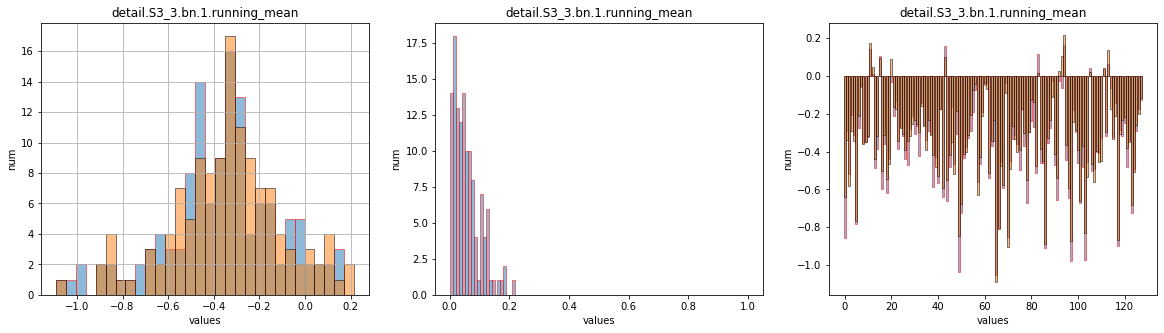

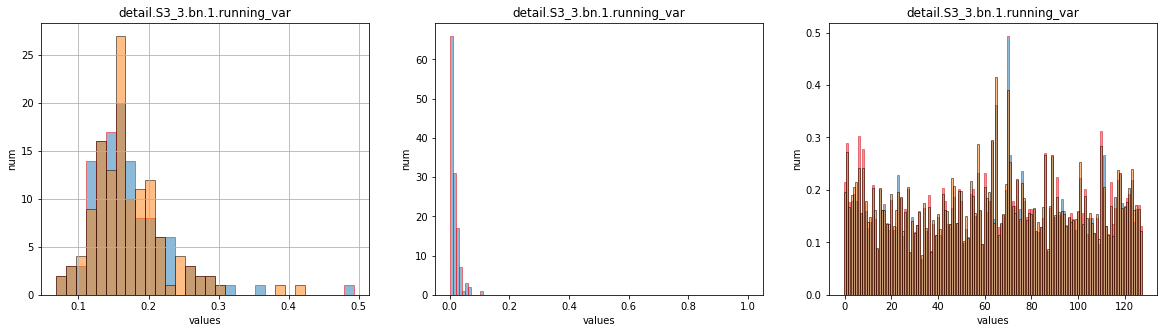

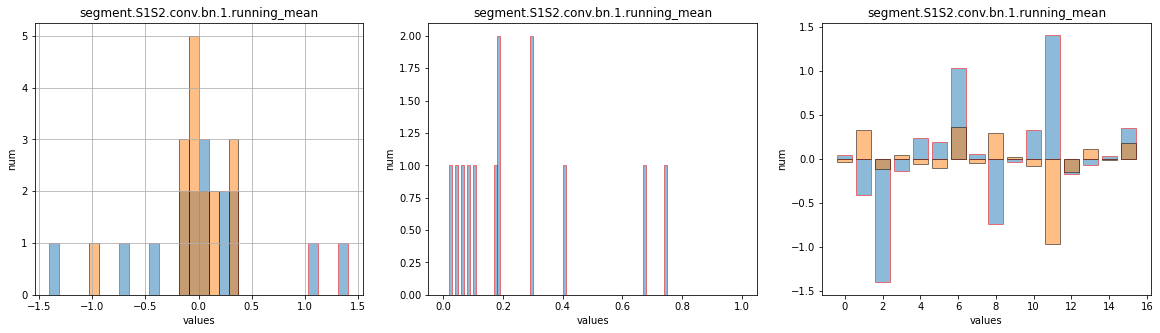

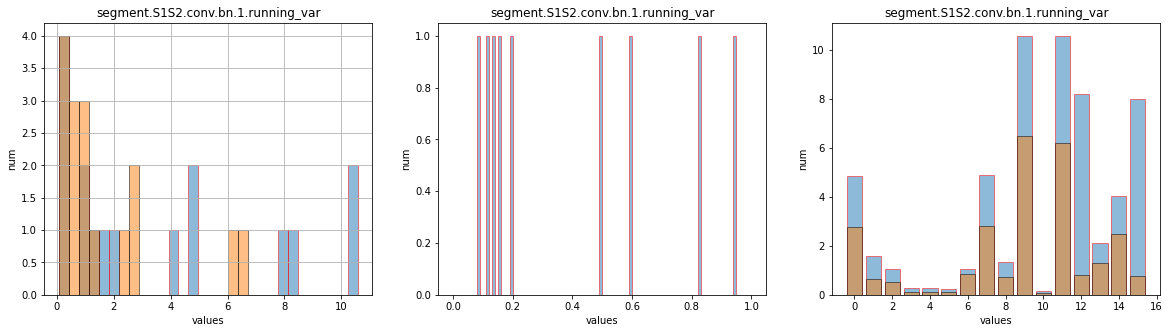

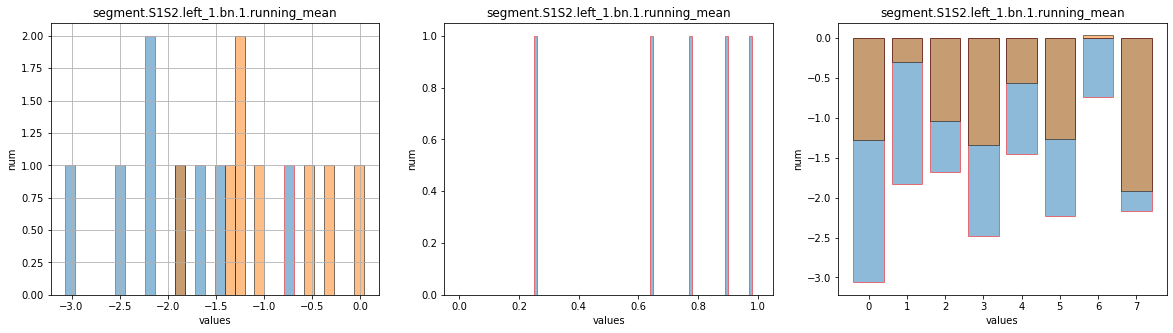

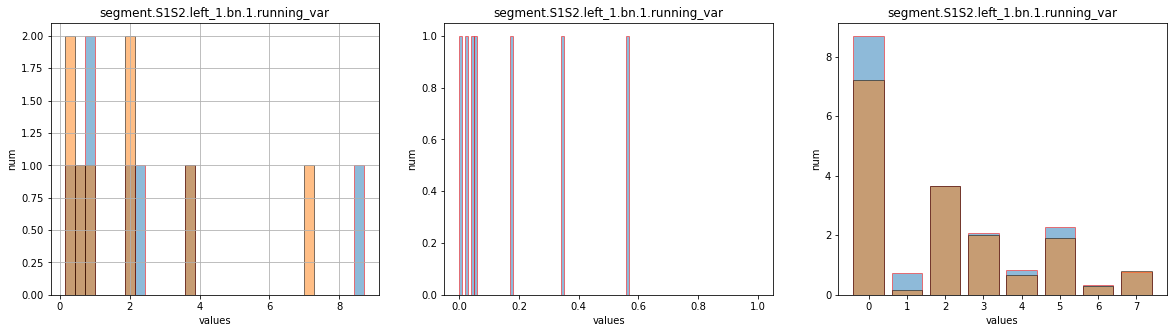

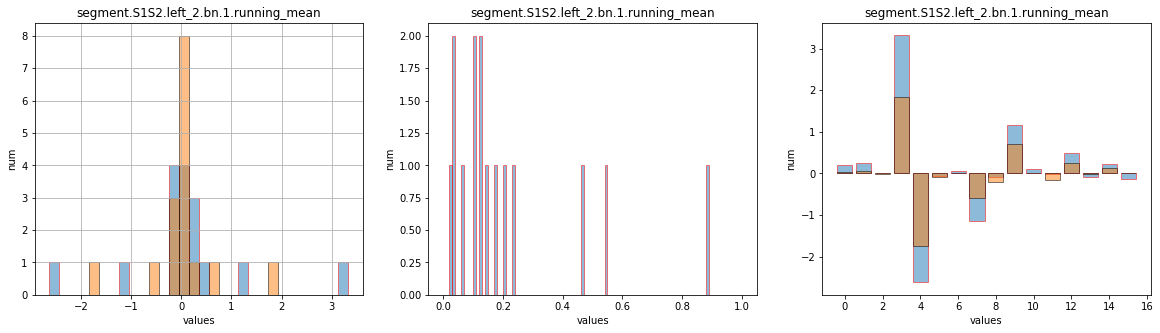

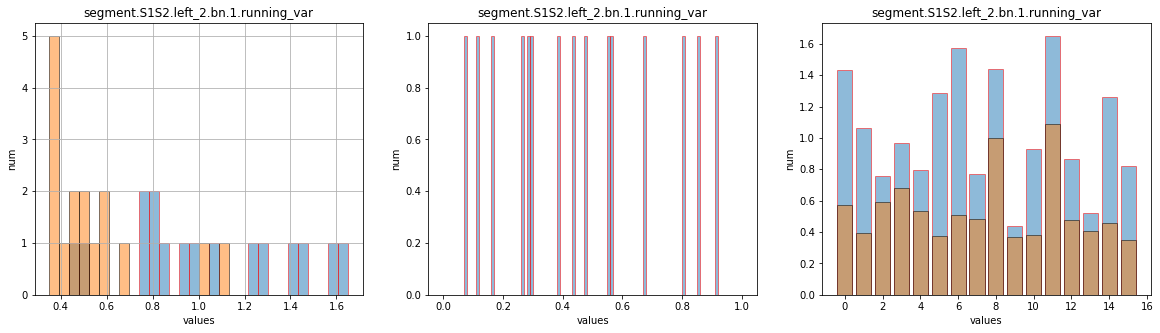

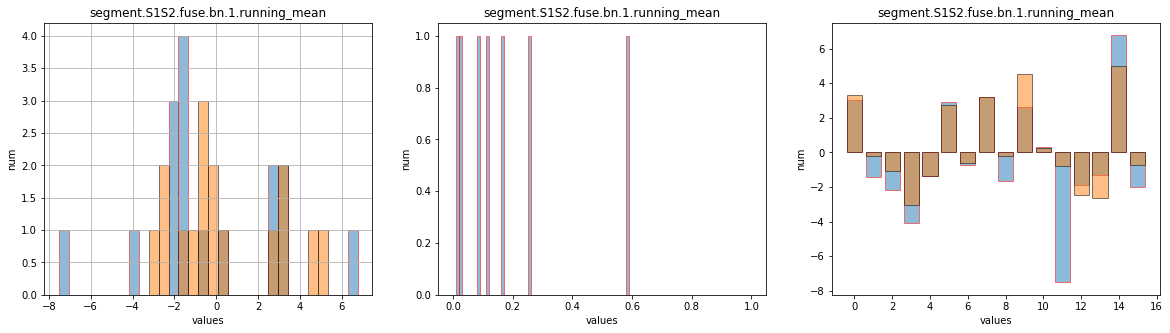

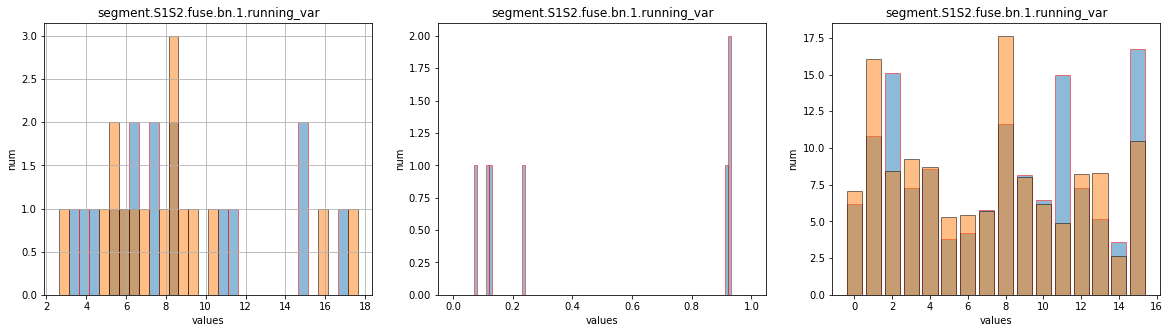

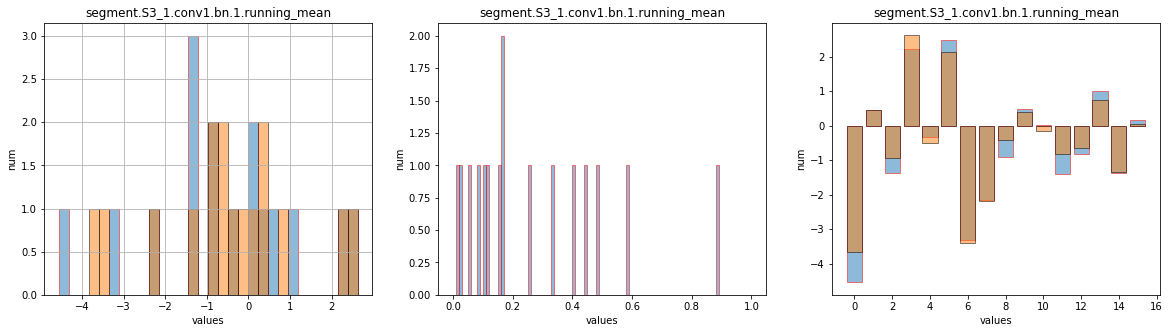

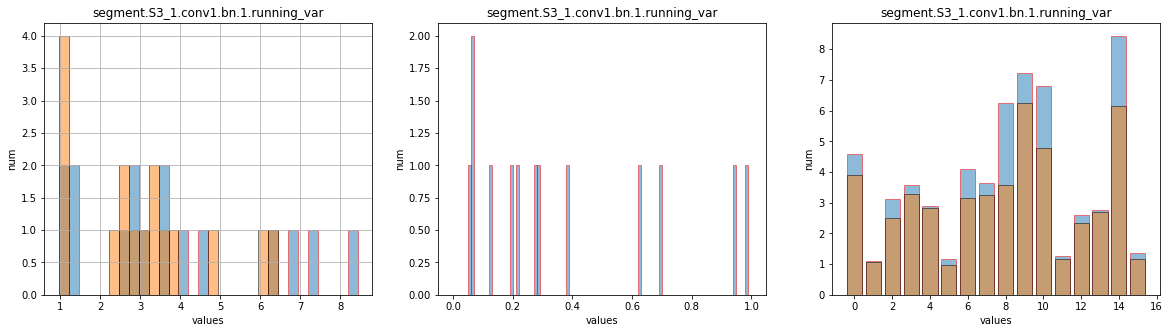

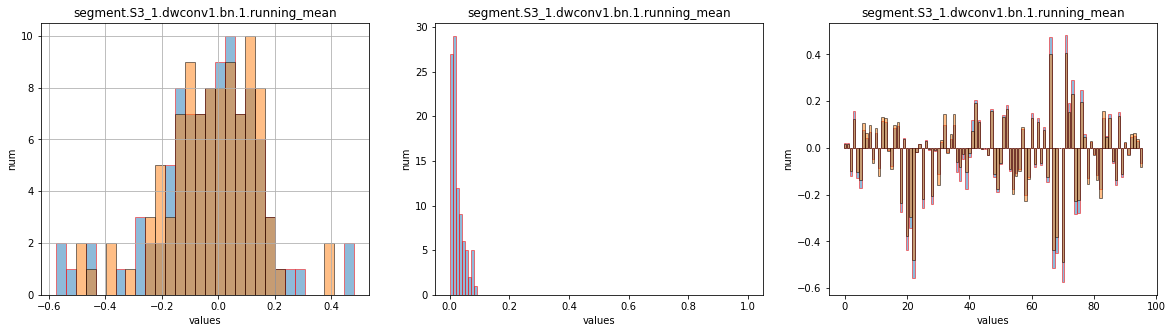

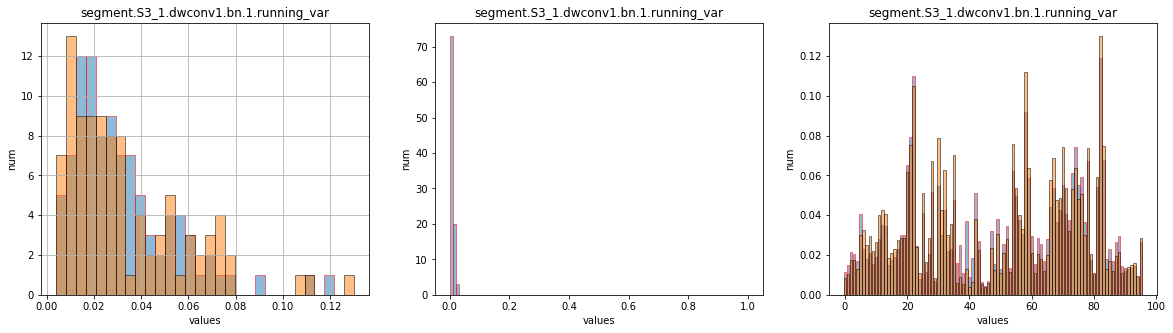

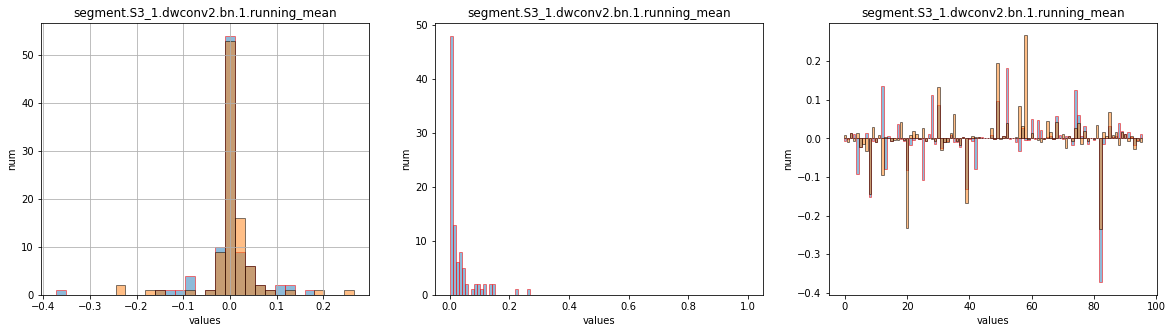

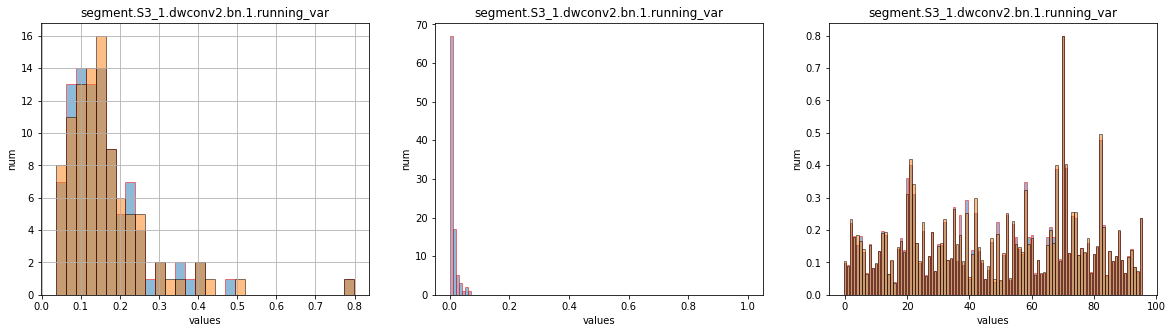

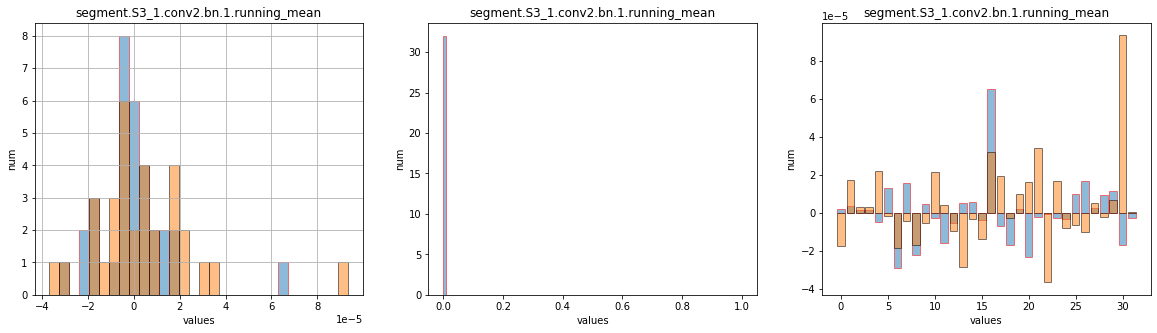

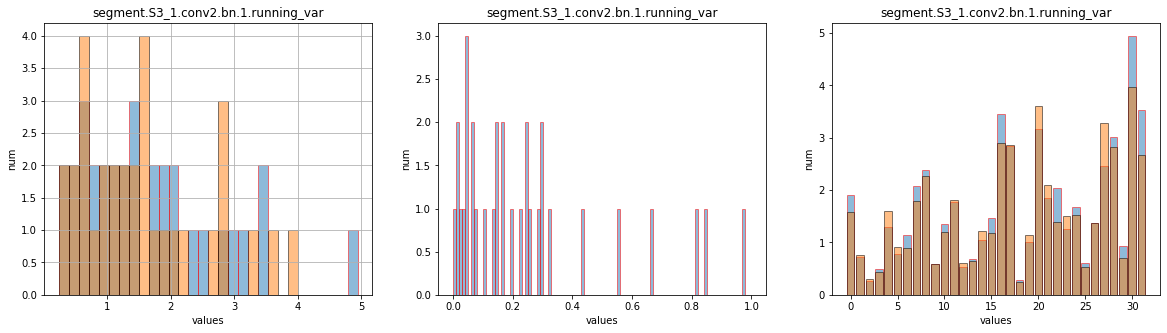

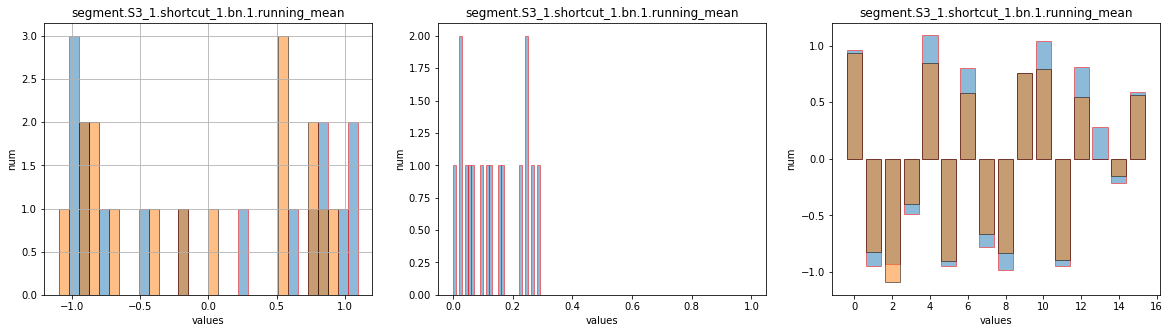

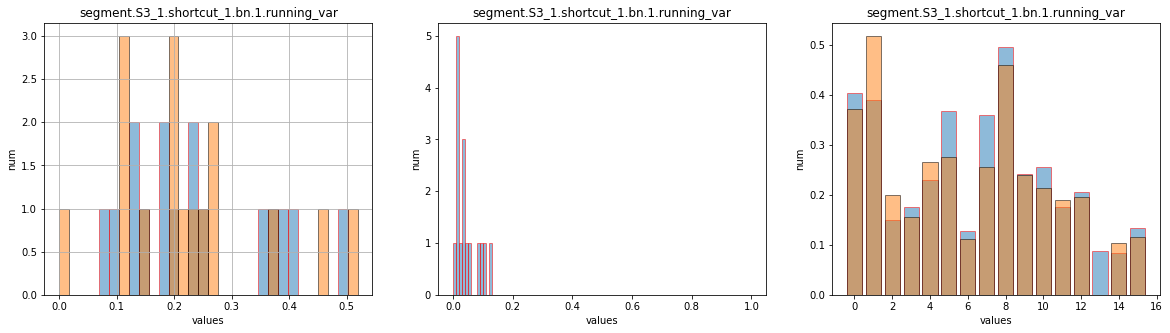

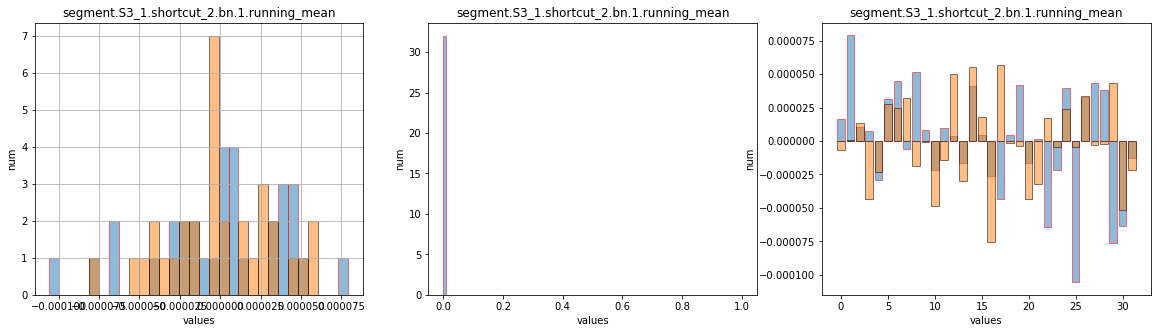

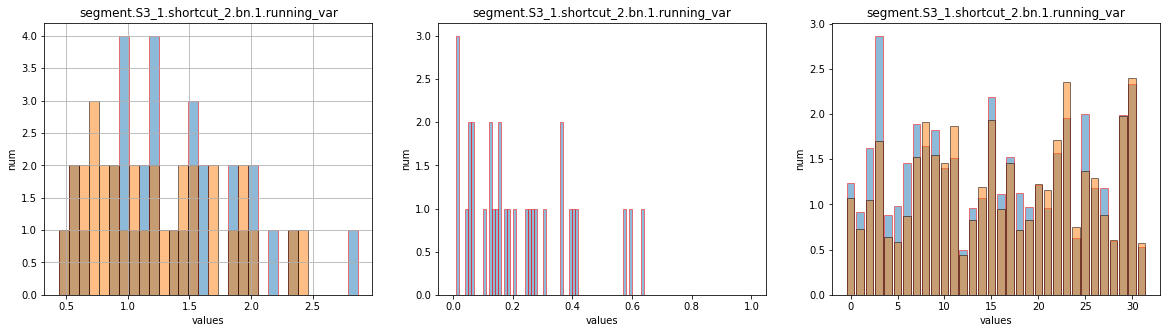

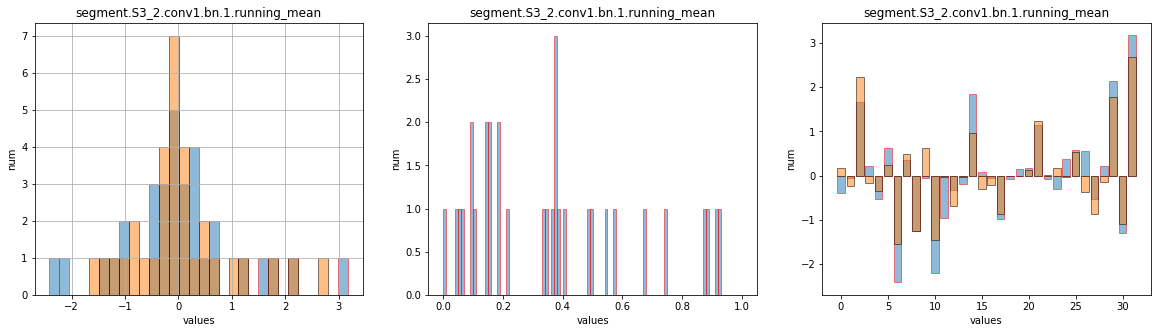

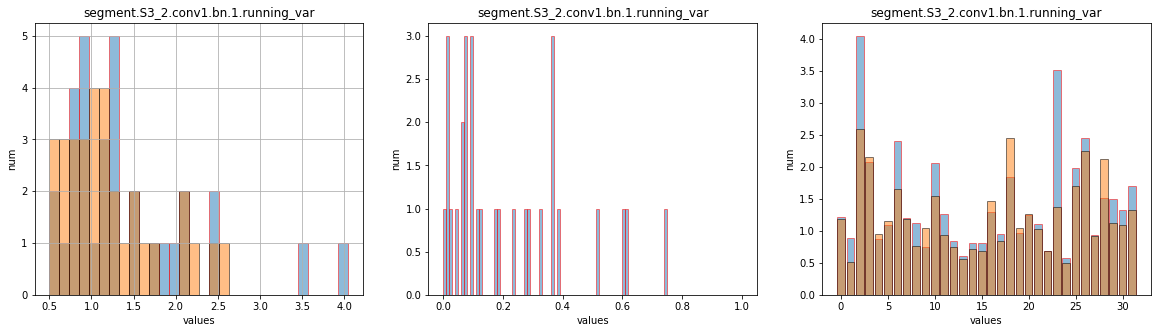

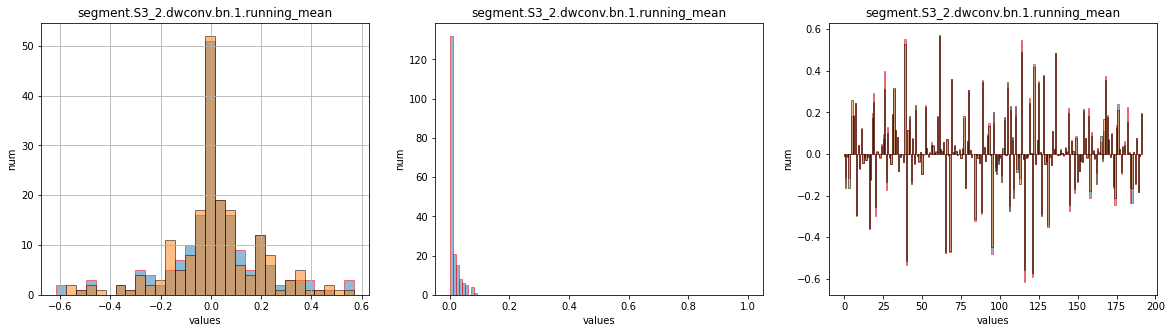

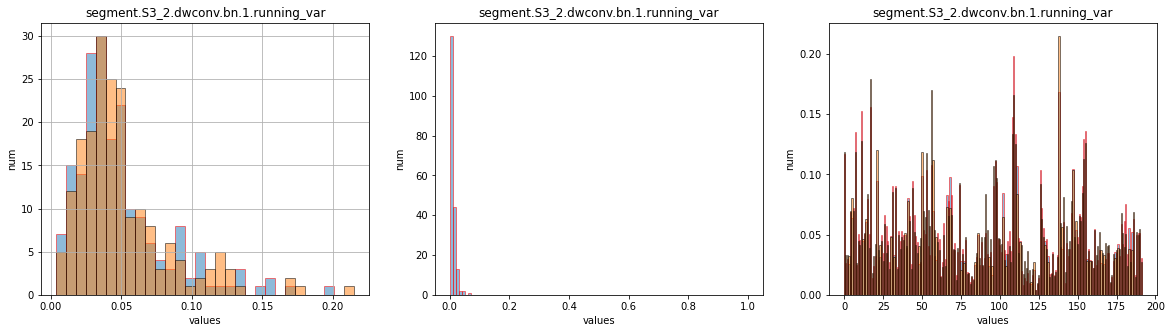

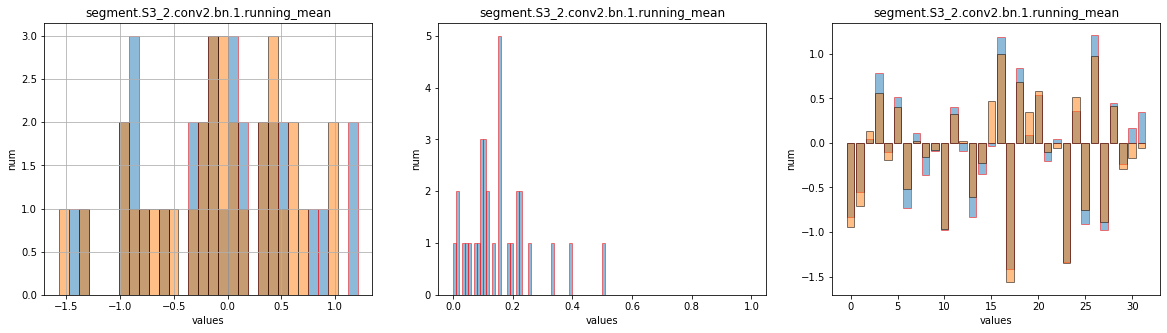

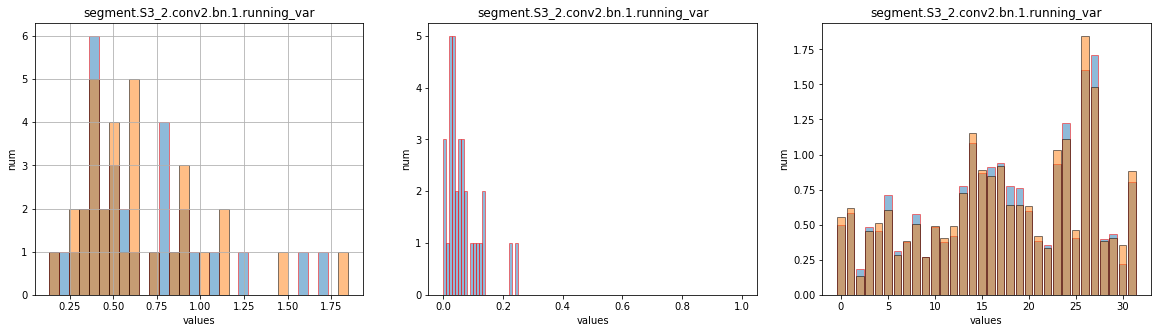

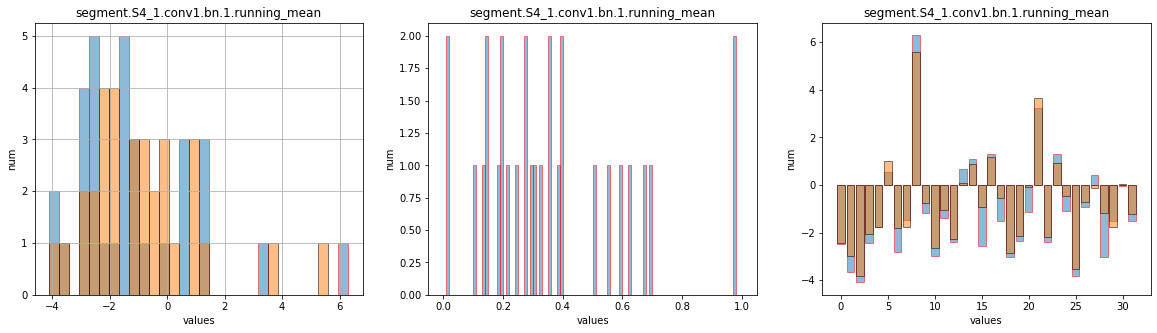

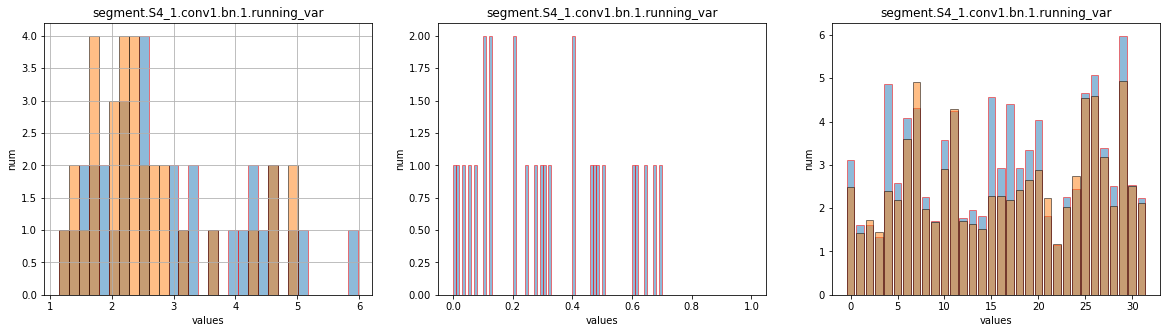

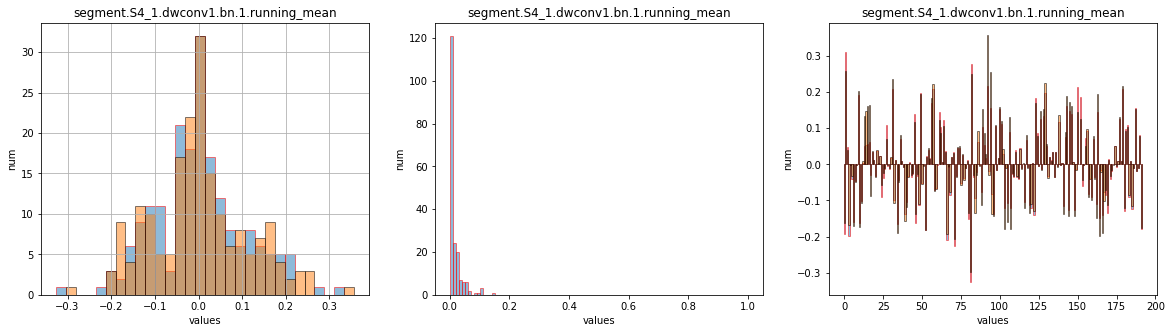

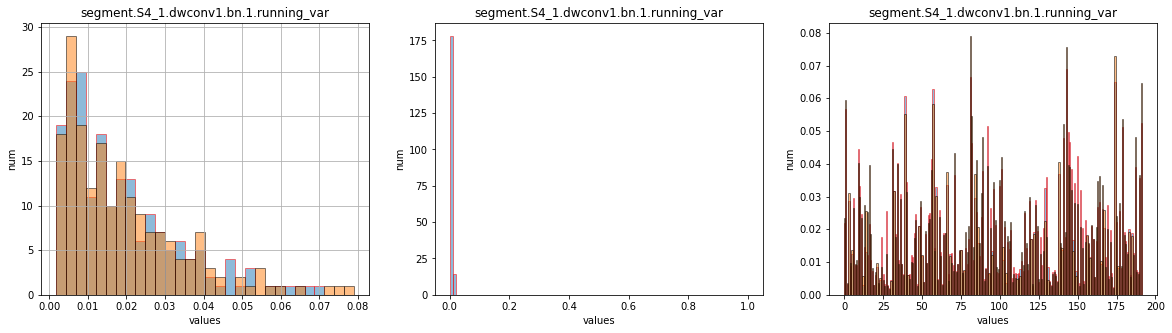

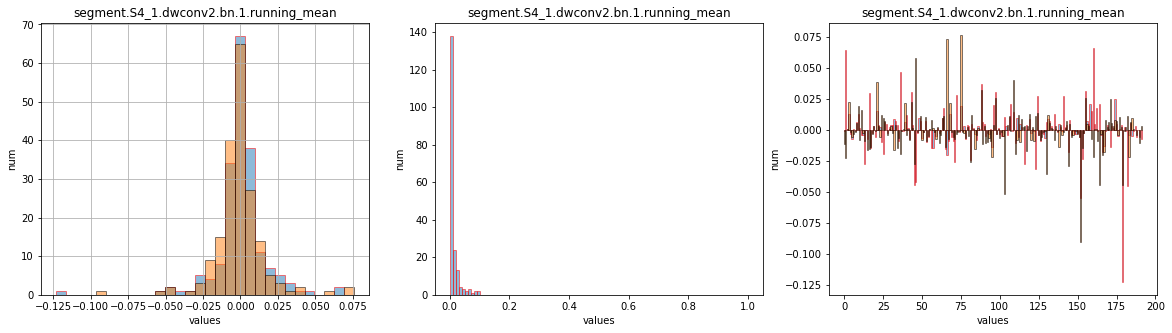

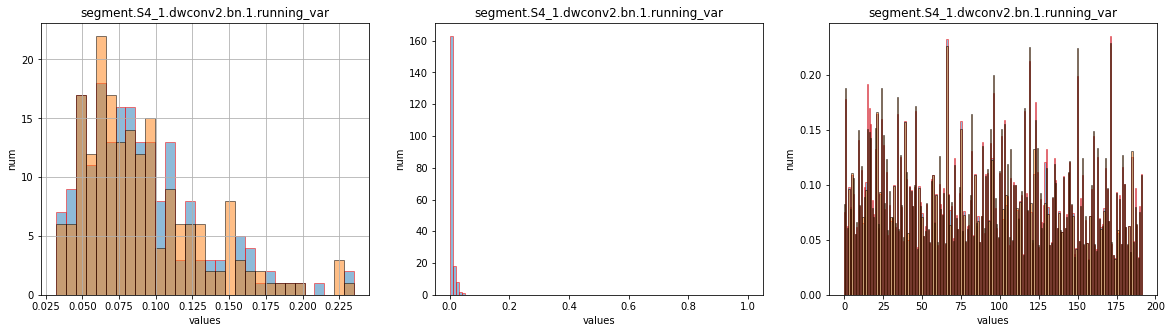

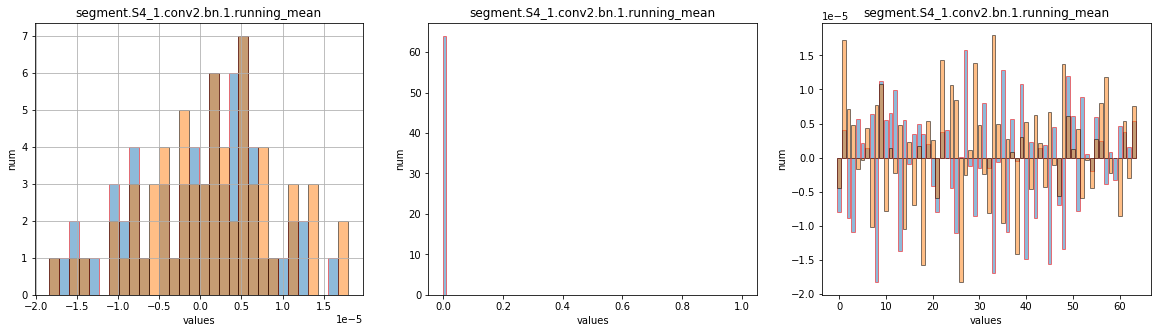

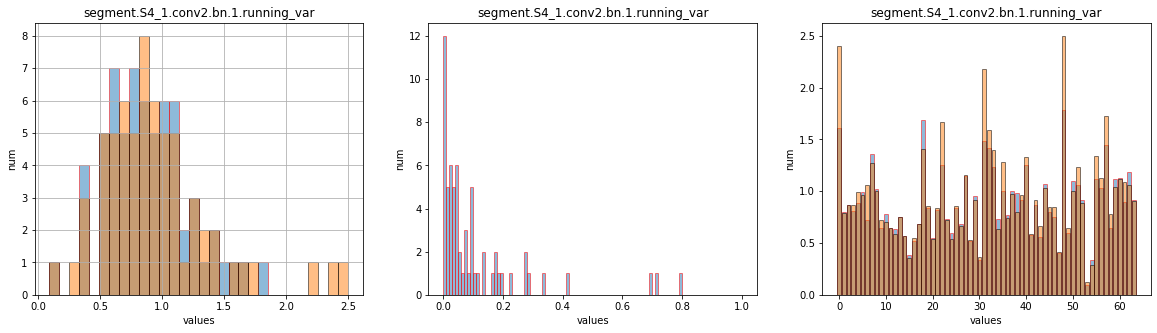

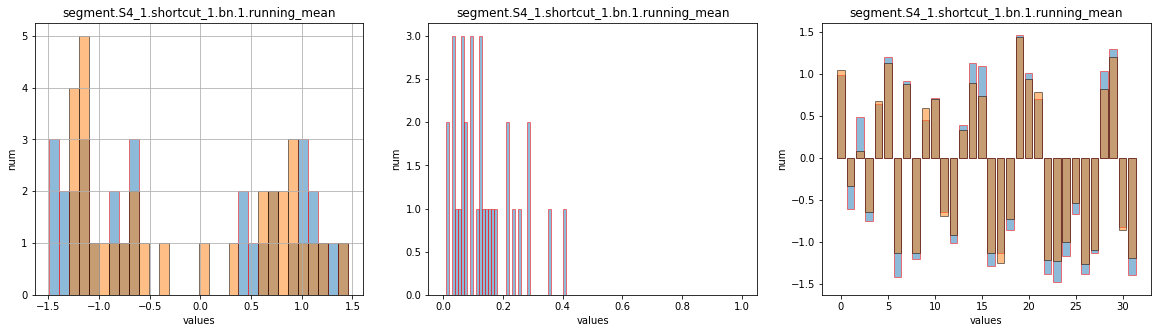

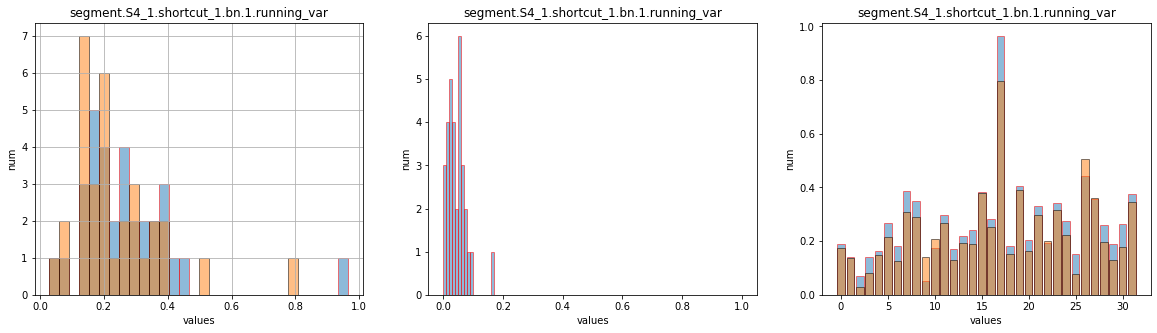

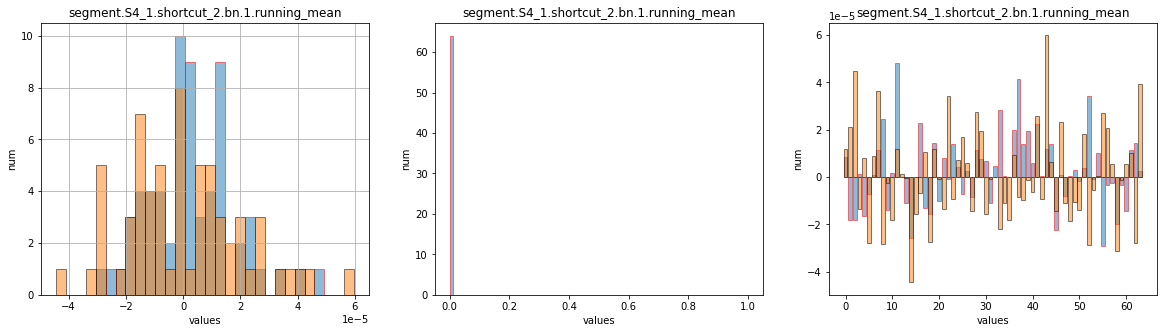

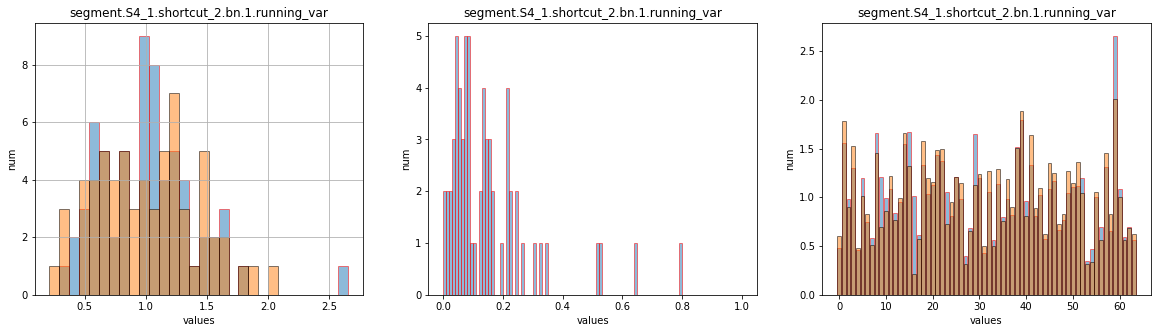

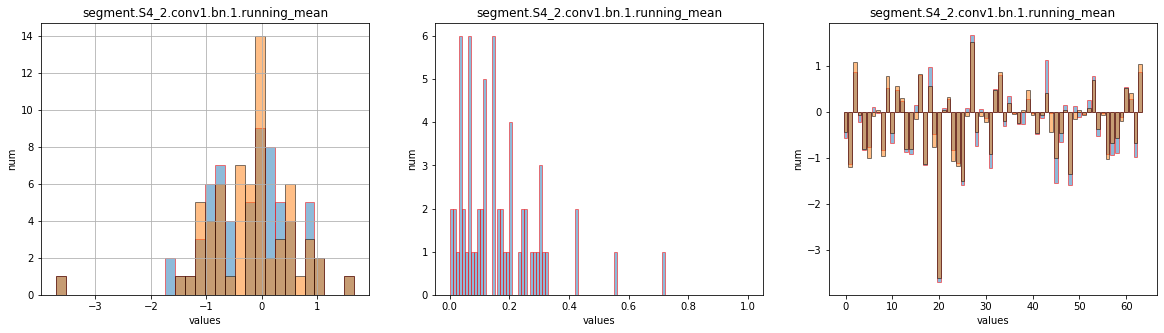

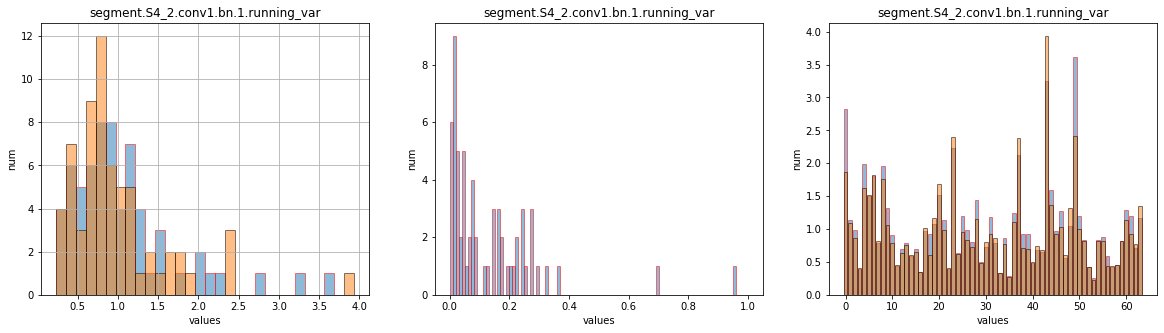

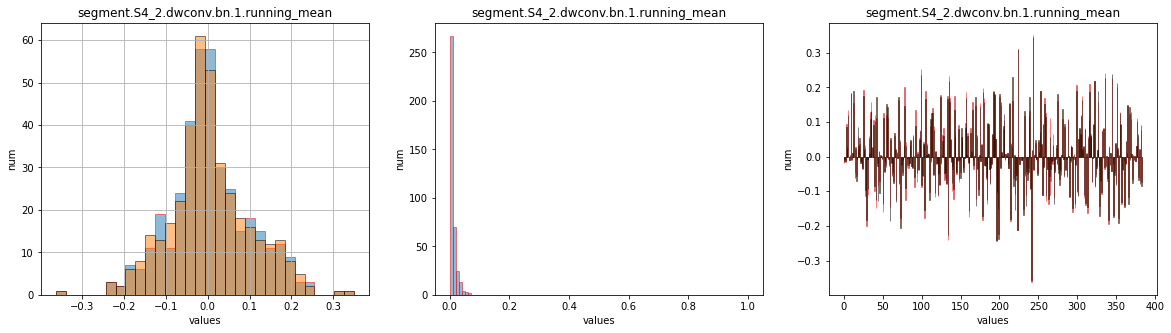

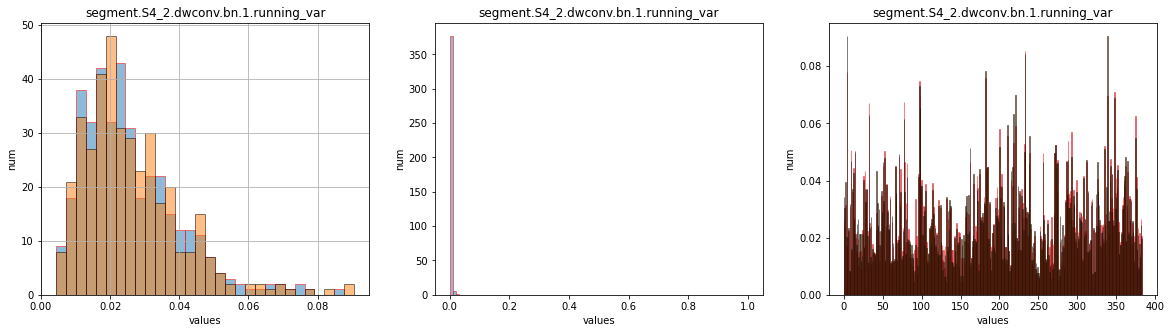

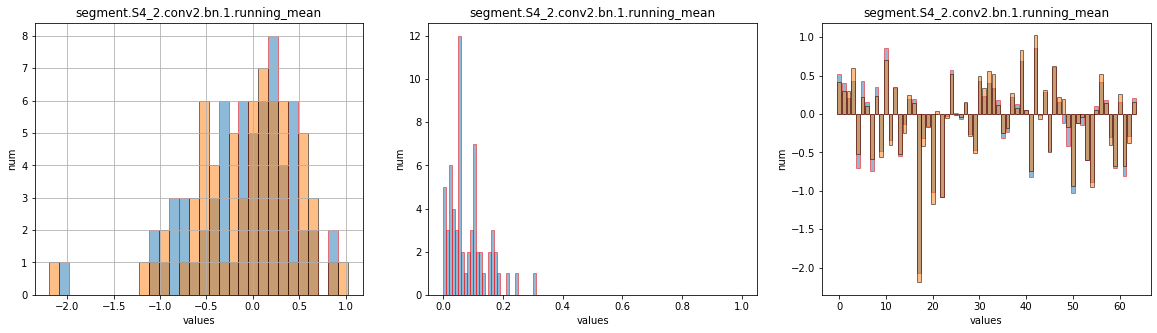

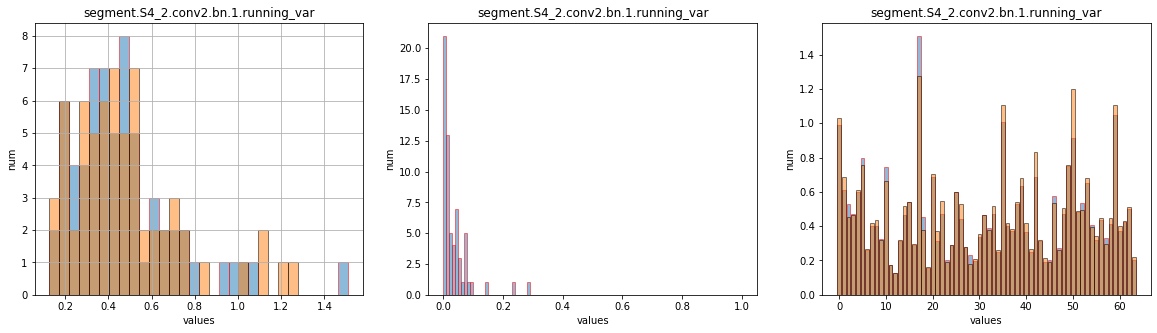

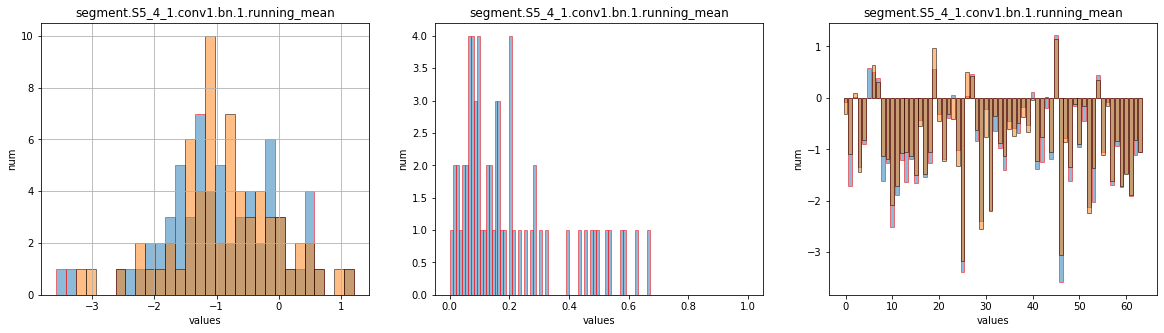

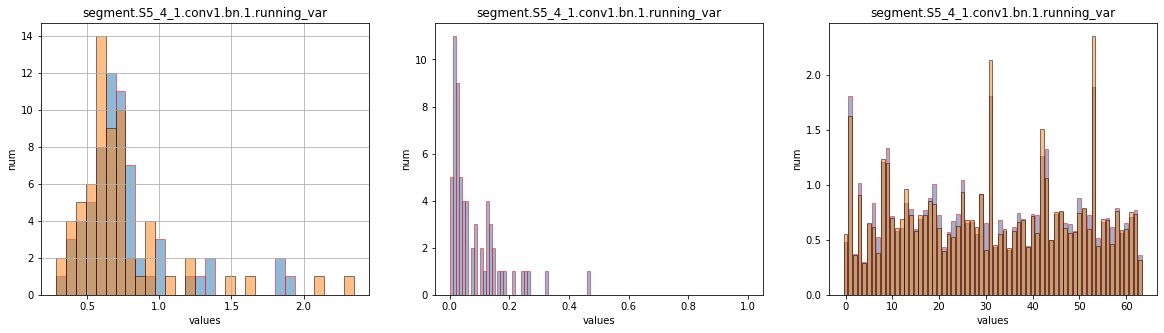

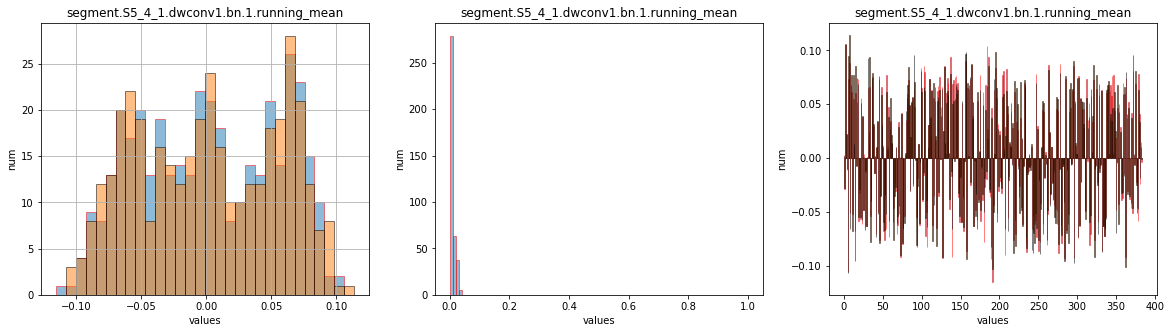

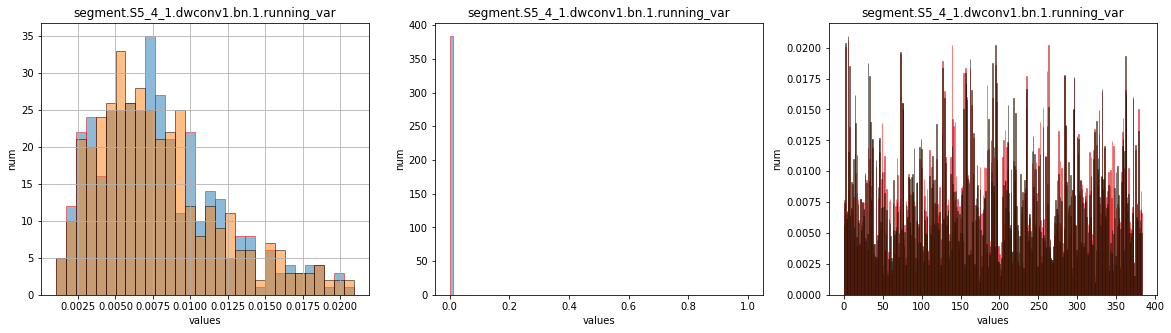

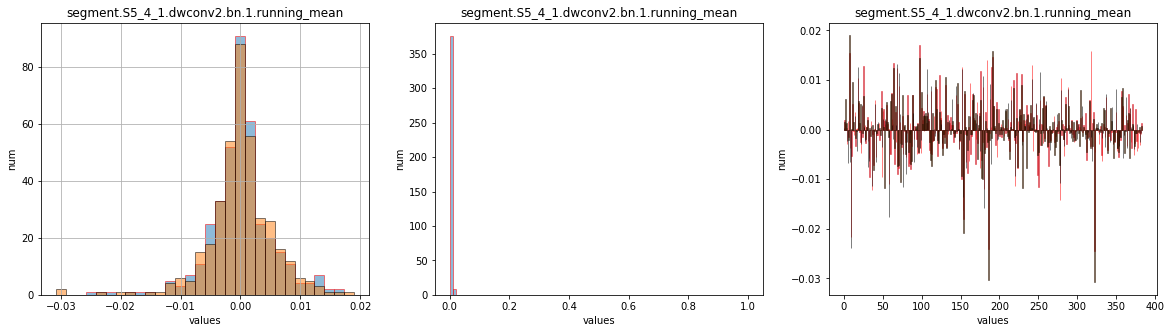

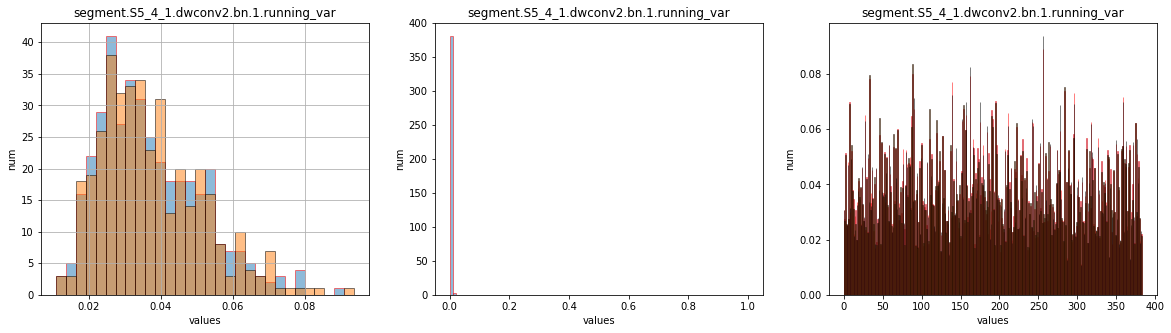

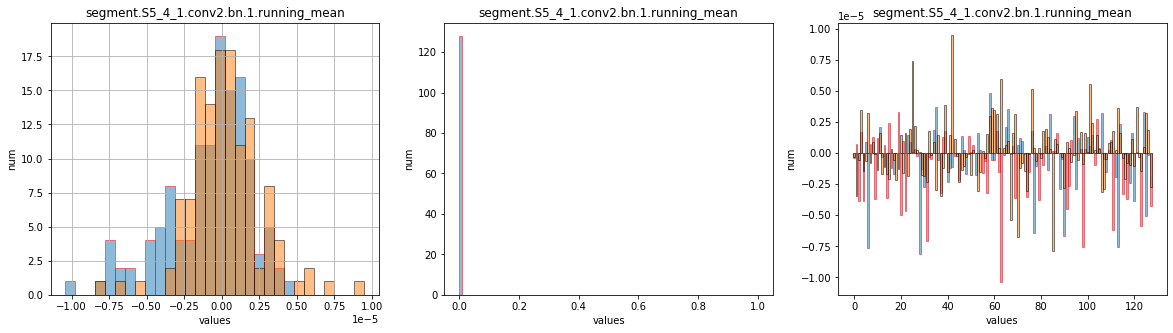

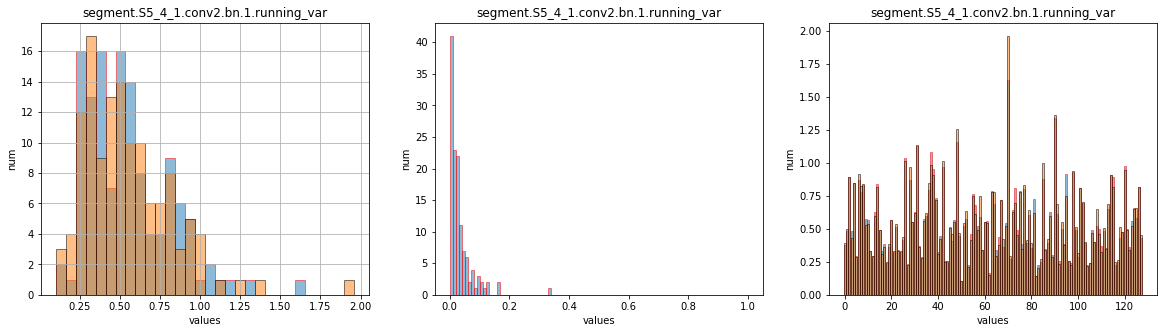

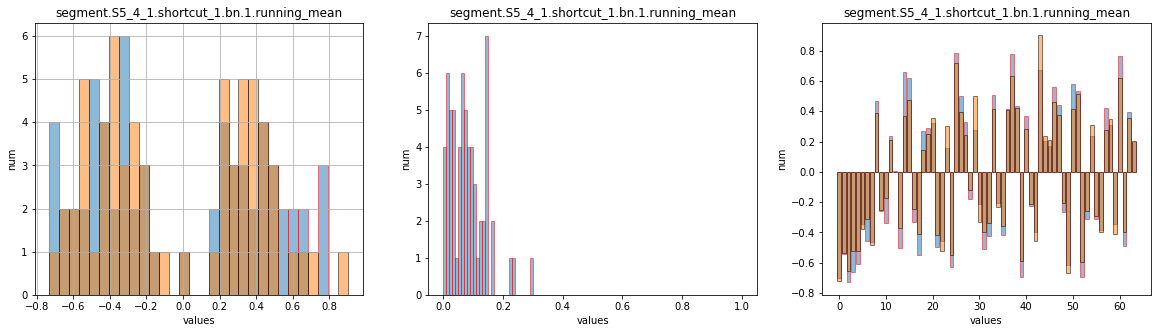

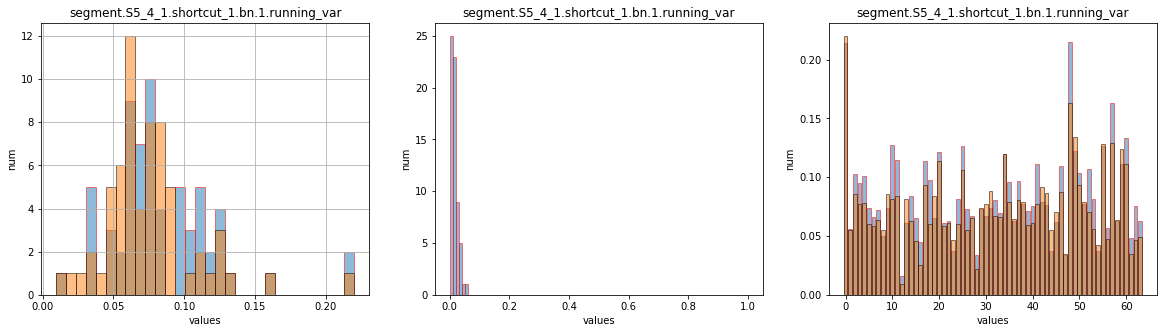

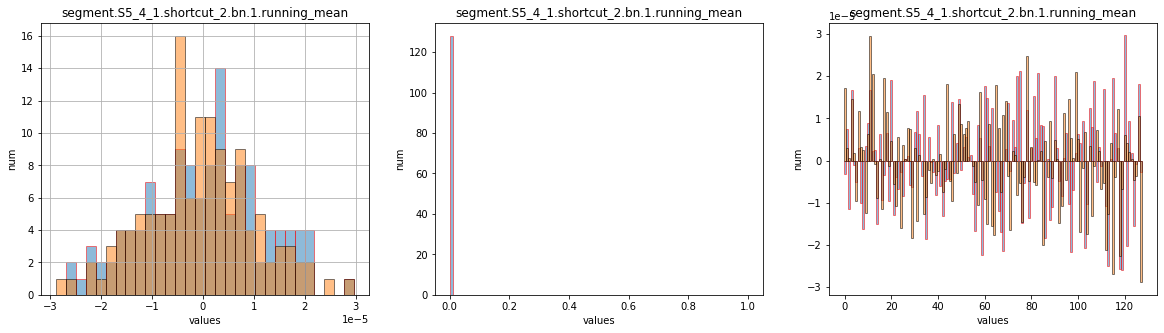

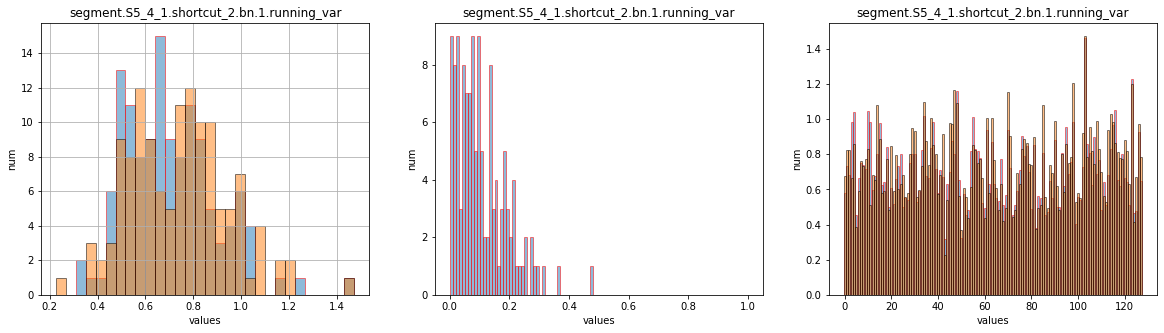

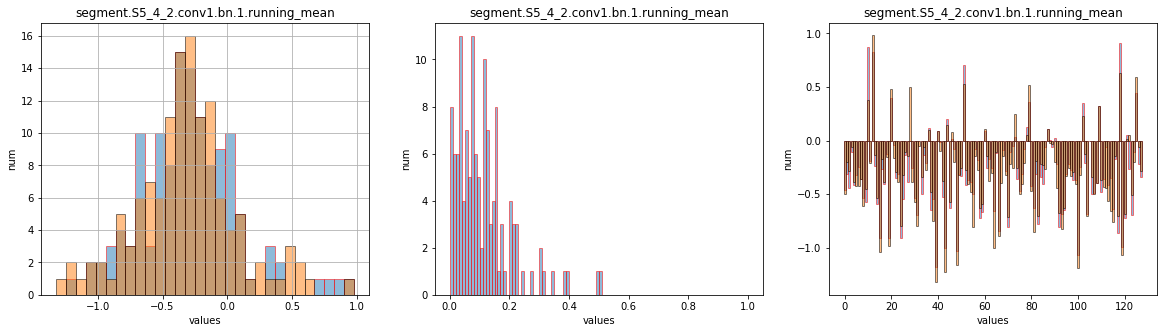

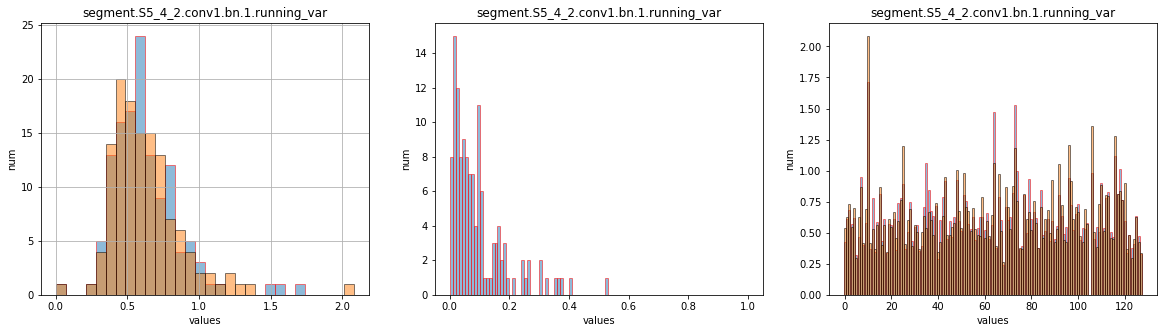

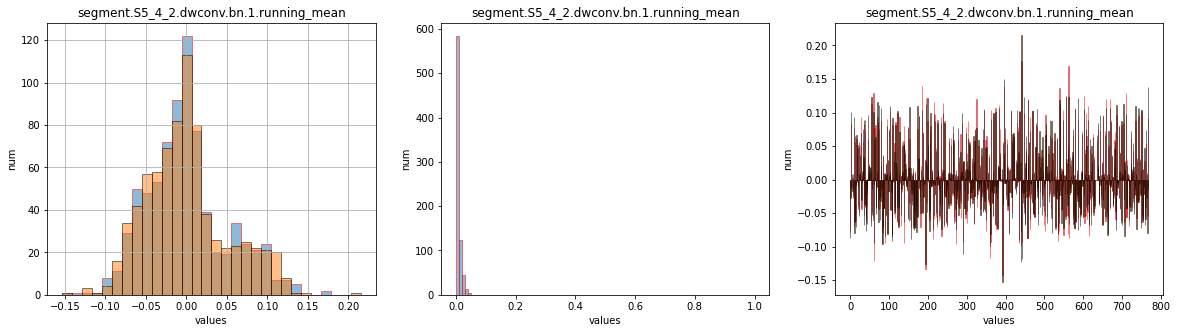

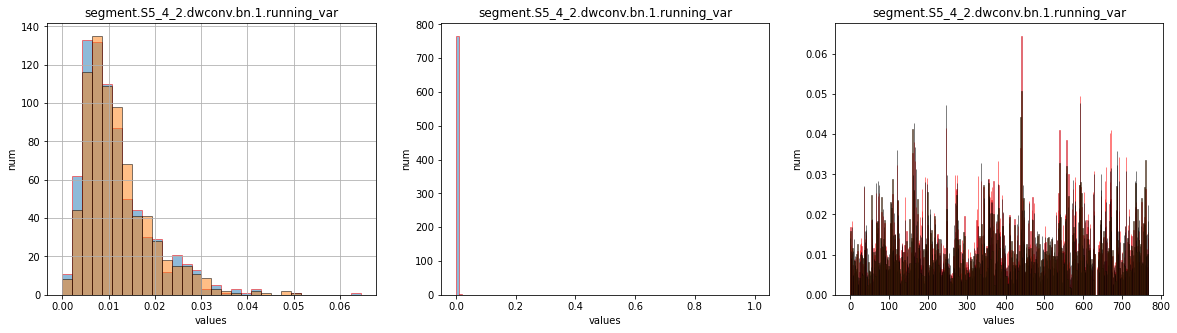

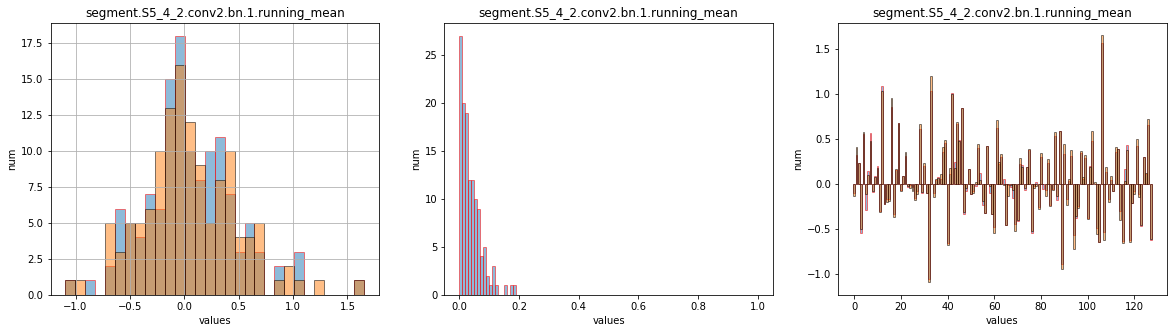

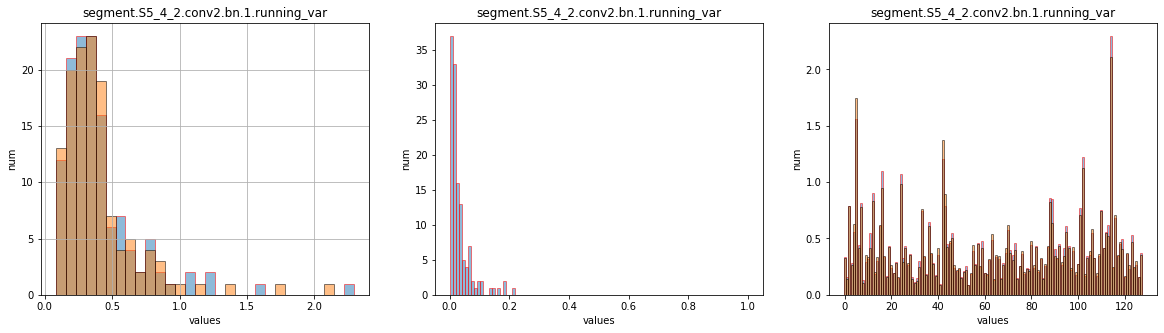

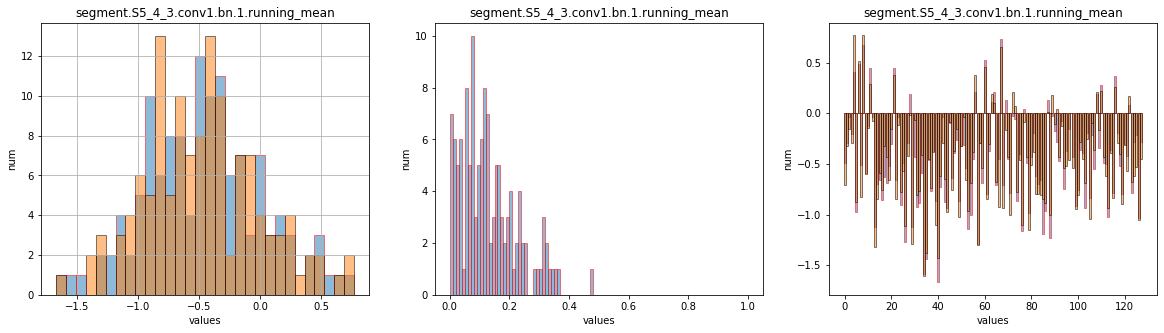

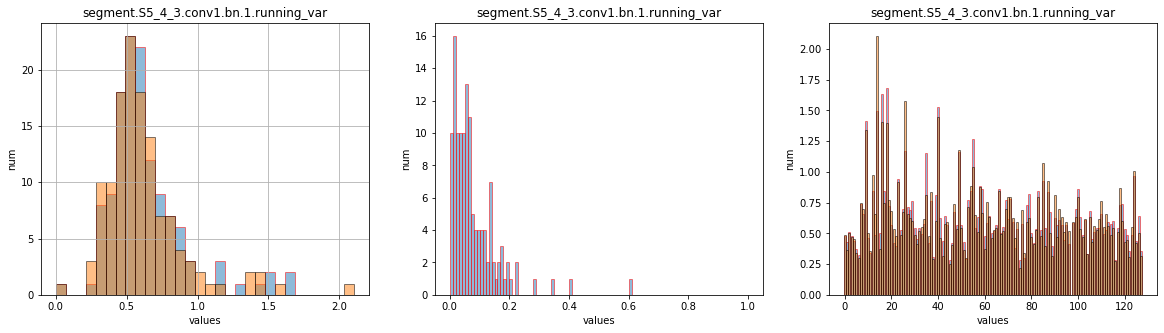

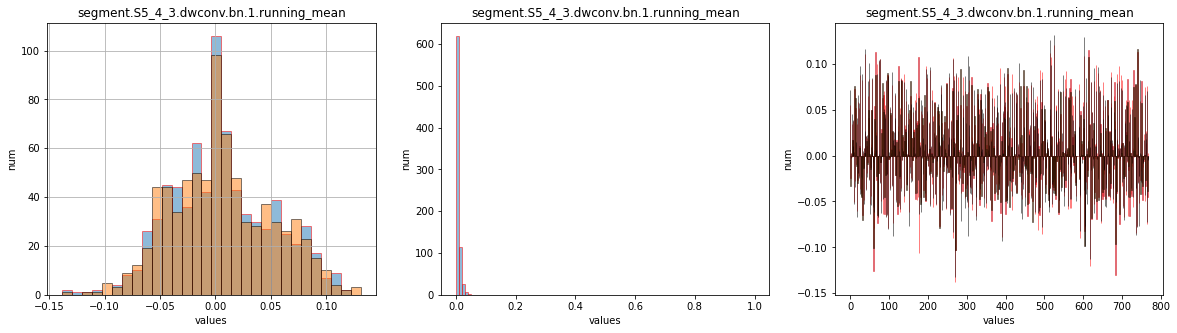

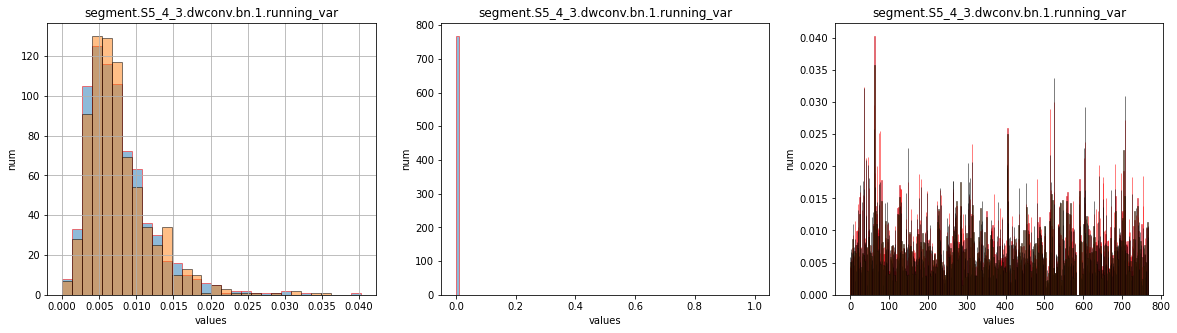

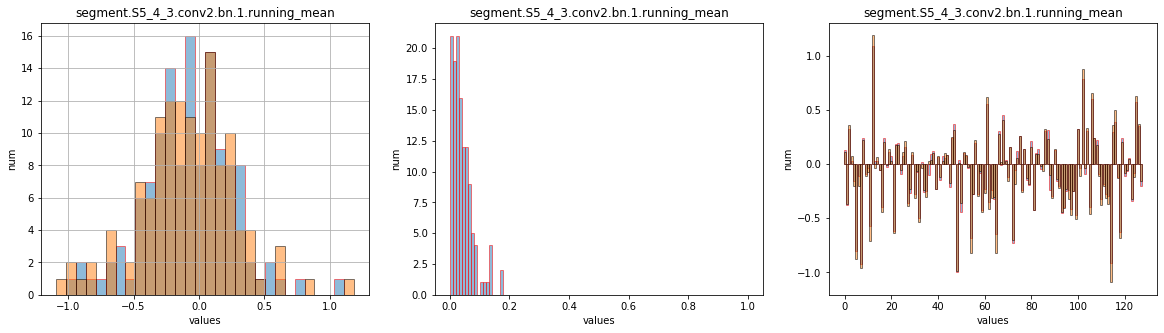

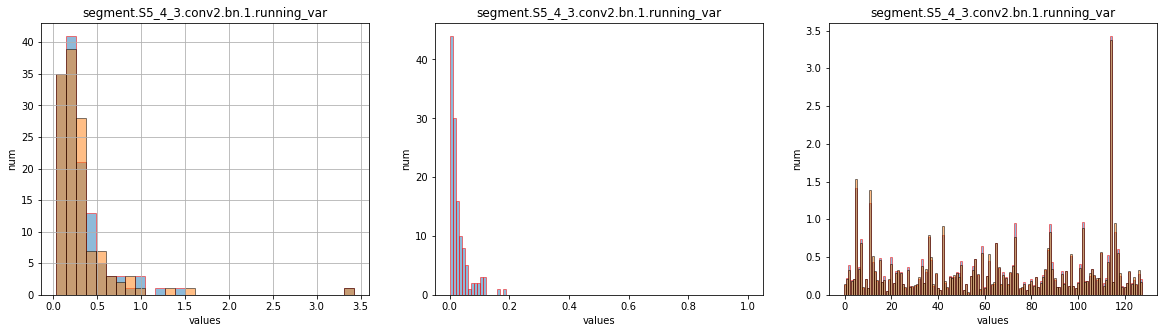

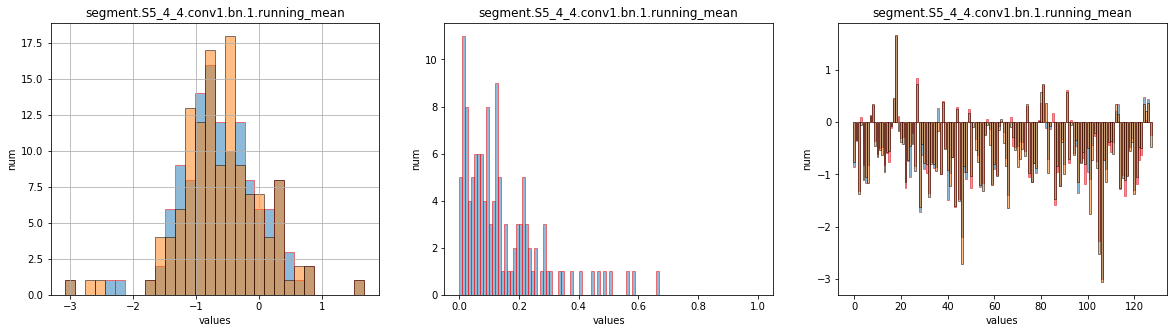

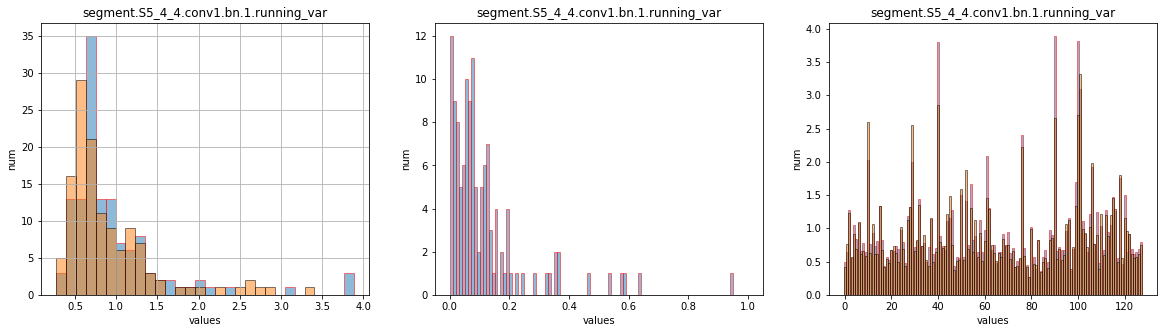

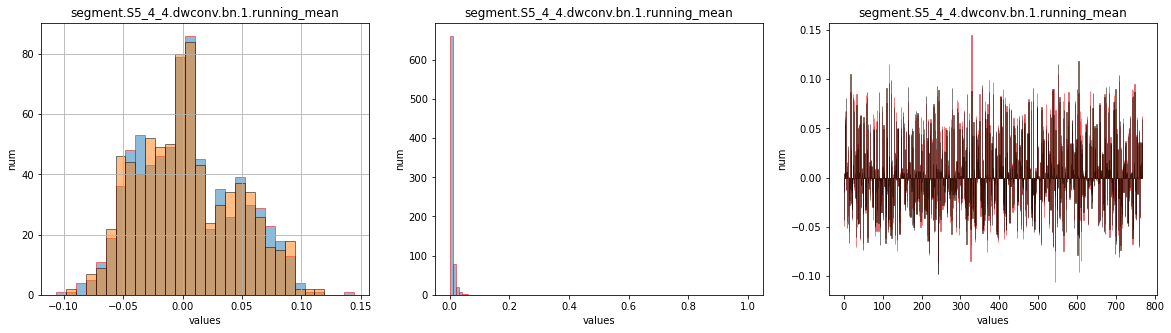

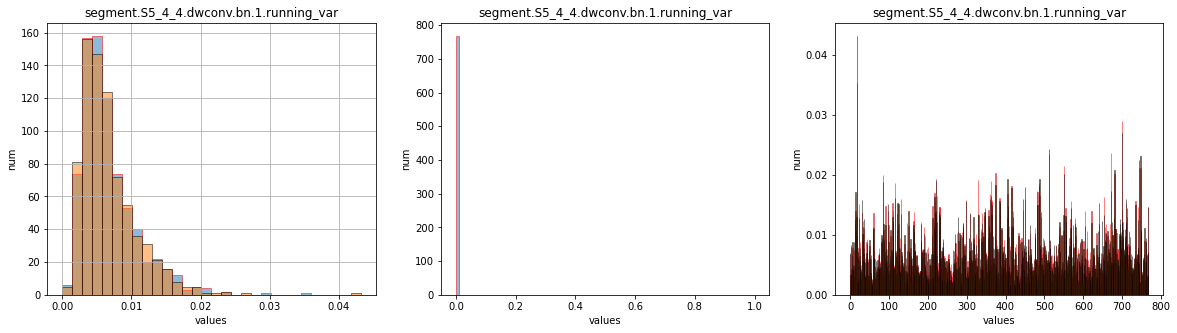

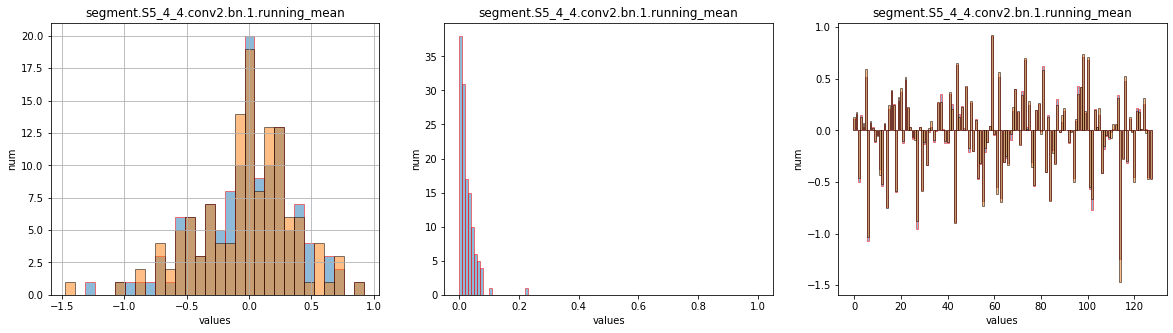

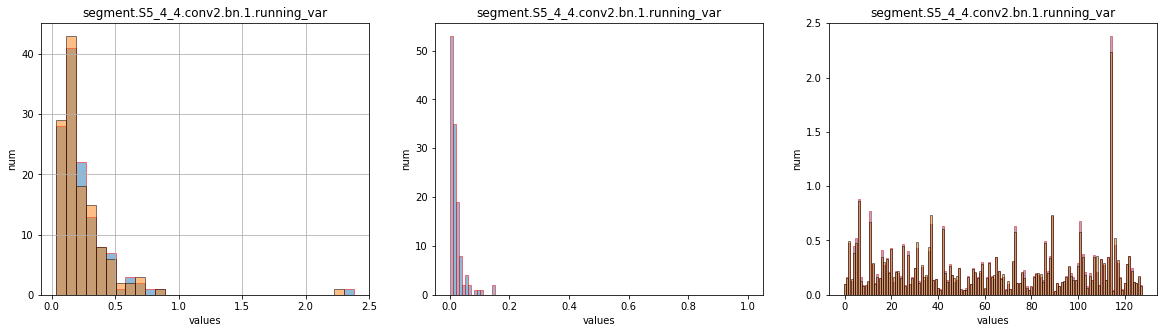

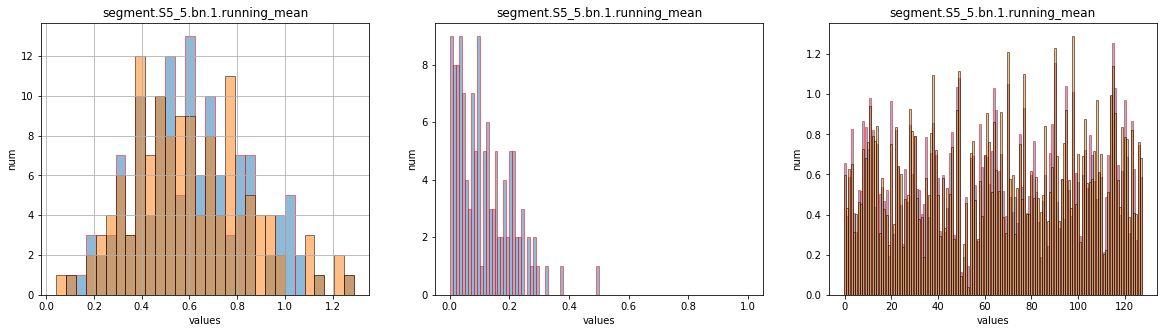

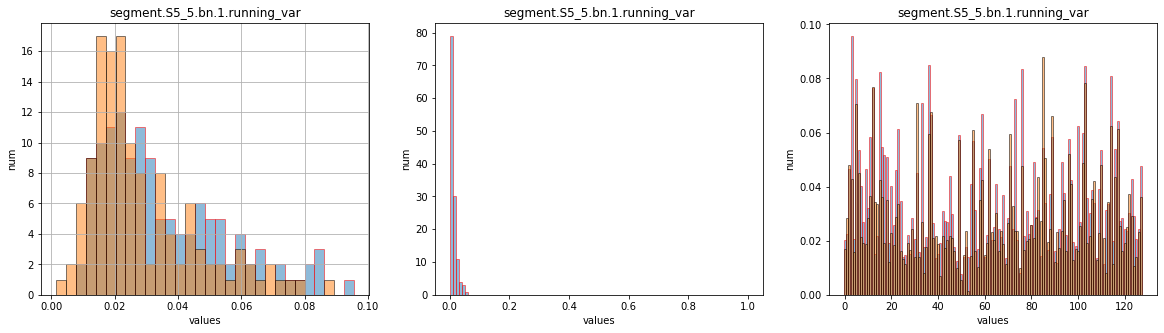

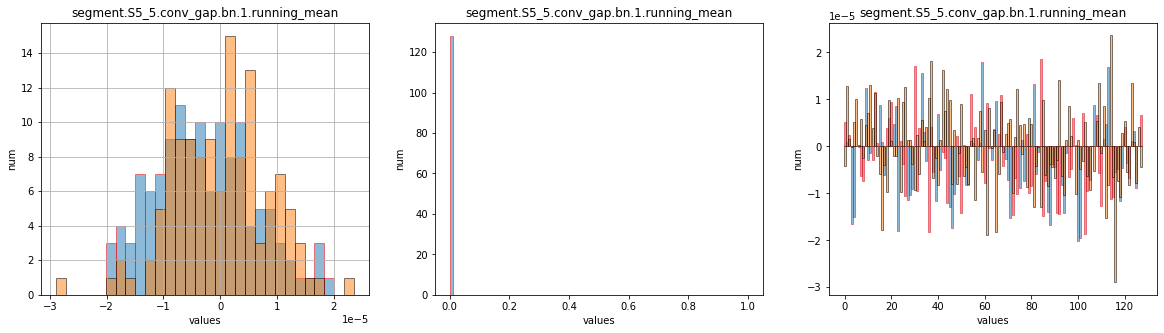

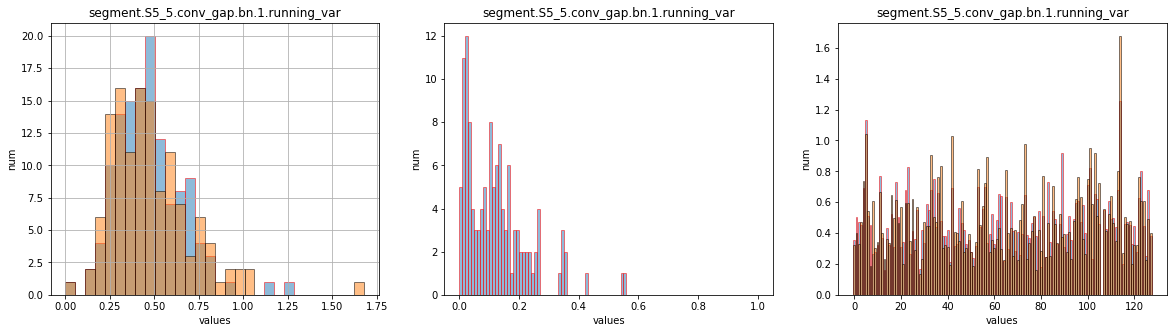

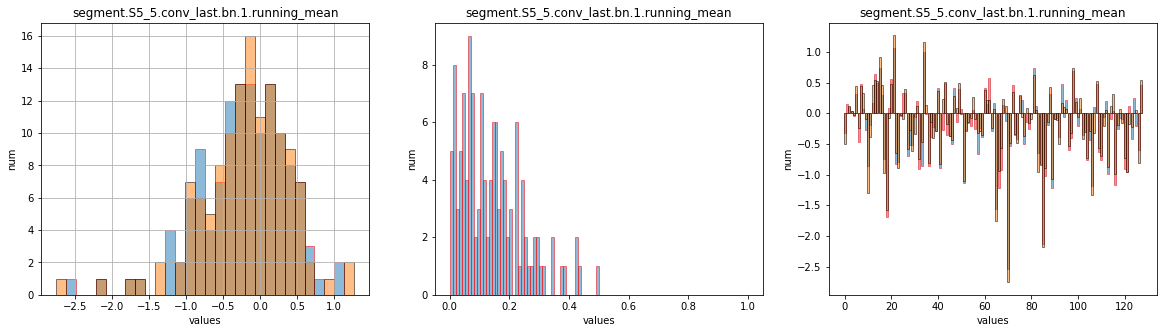

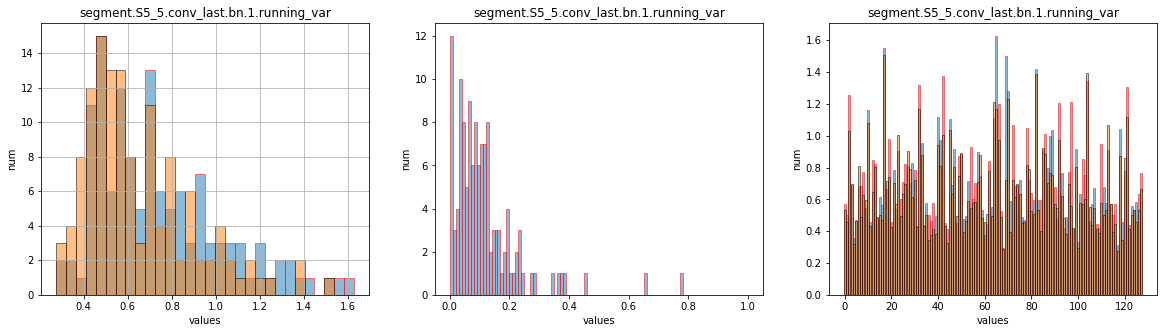

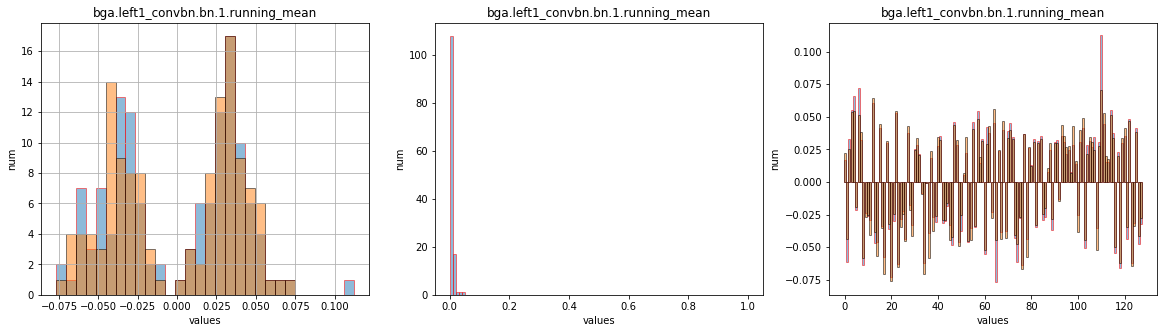

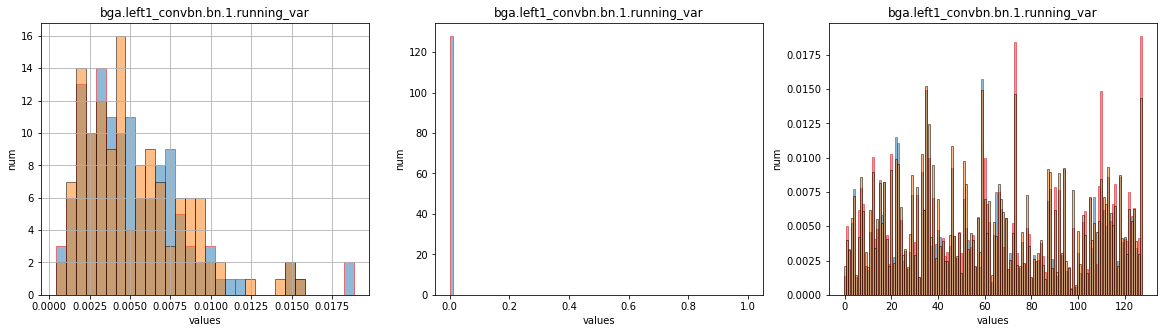

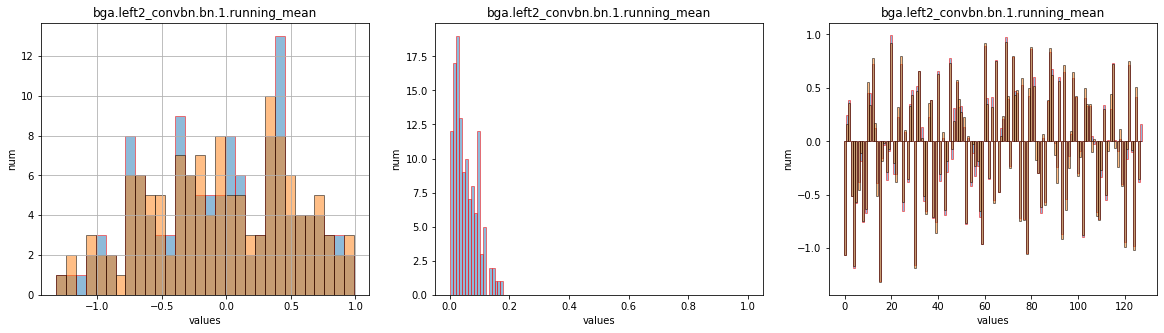

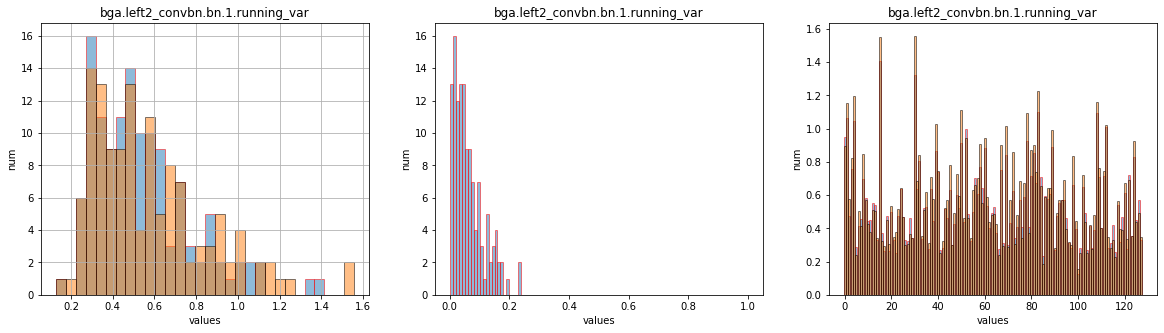

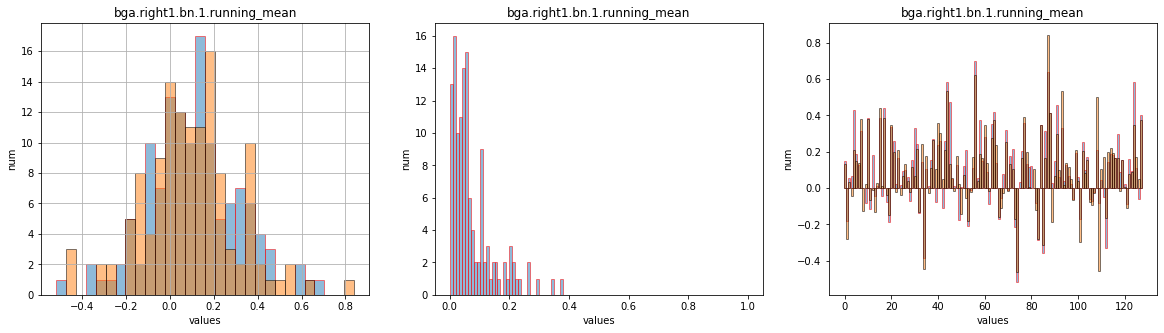

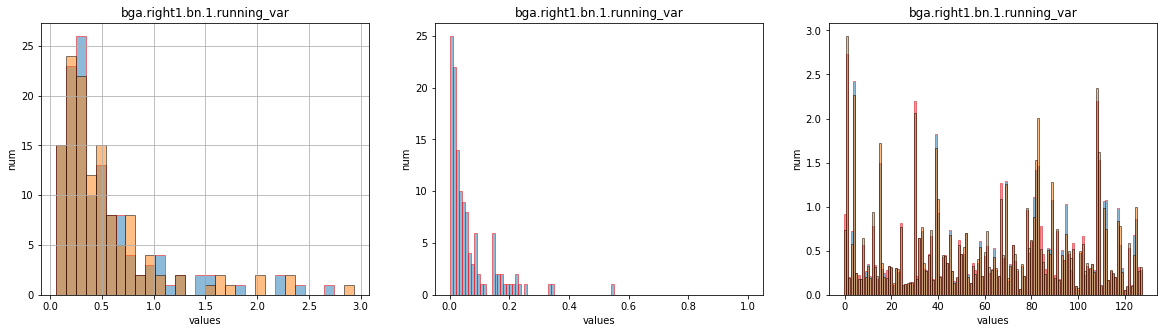

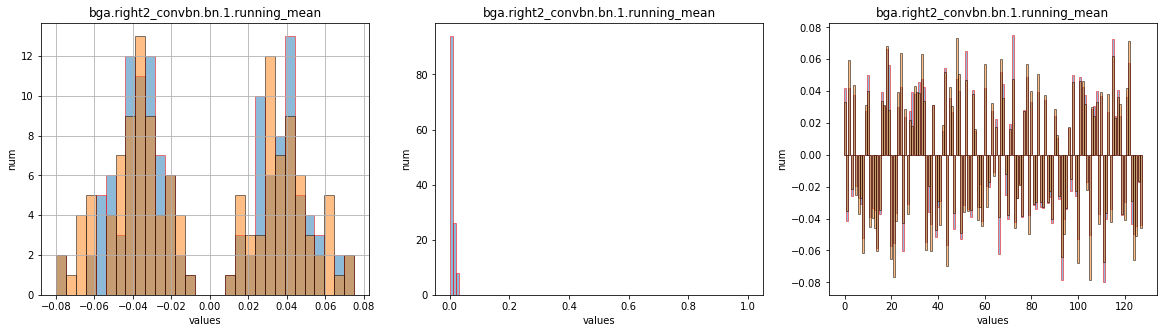

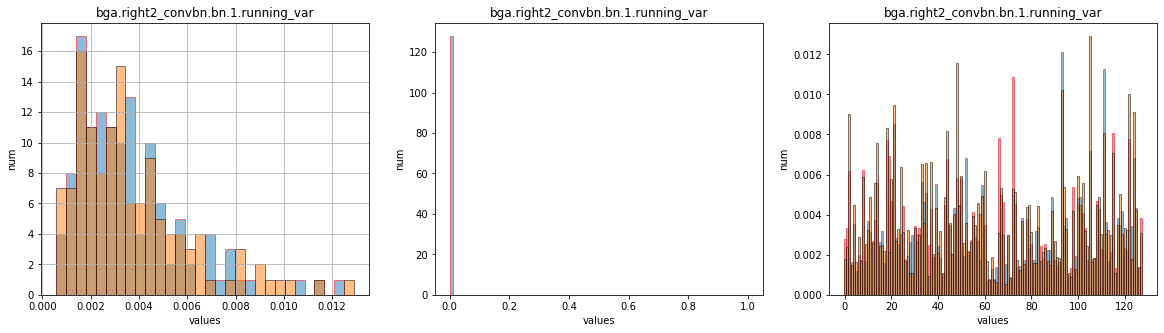

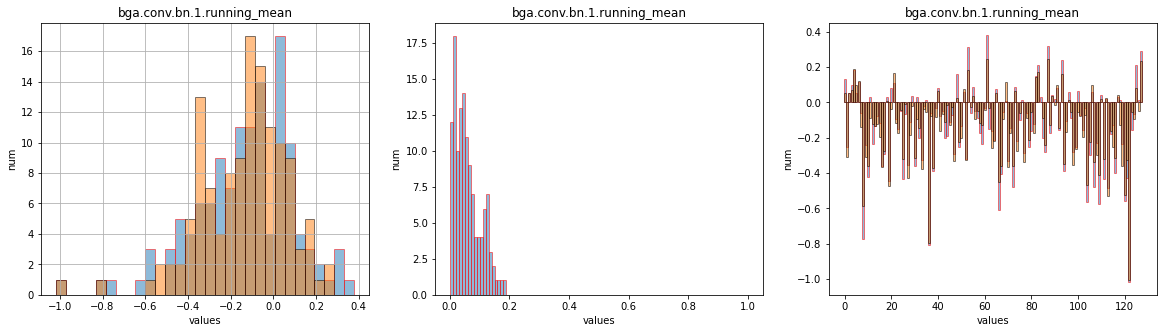

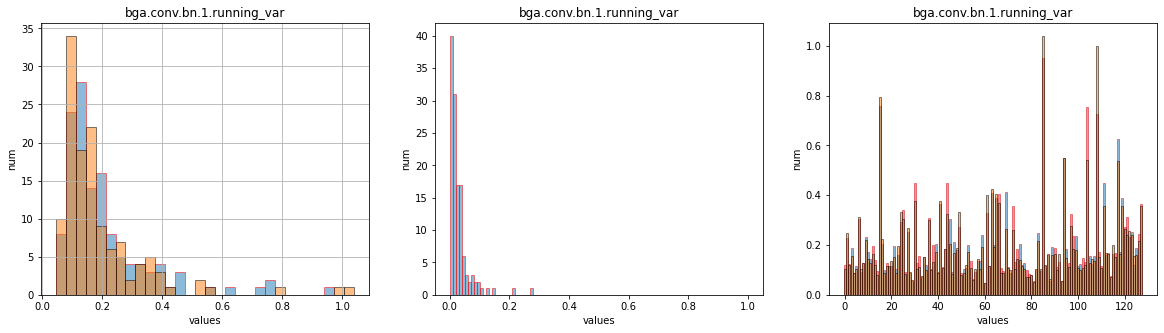

In [39]:
mean_count = 0
var_count = 0
temp_mean = 0
temp_var = 0
for key in state.keys():
    if key.find('bn') != -1 and key.find('aux') == -1 and key.find('head') == -1:
        if key.find('running_mean') != -1:
            mean_count += 1
            if mean_count == 2:
                mean_count = 0
                plotAll(temp_mean, state[key], str(key))
            else:
                temp_mean = state[key]
        elif key.find('running_var') != -1:
            var_count += 1
            if var_count == 2:
                var_count = 0
                plotAll(temp_var, state[key], str(key))
            else:
                temp_var = state[key]